In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [3]:
#Initial look at data
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [4]:
df.rename(columns={'Province/State':'State','Country/Region':'Country'}, inplace=True) 

In [5]:
#changing to pandas date format
#df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#handling missing values 
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [7]:
df3 = df2.groupby(['Date', 'Country'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [8]:
df3

Date             Country Confirmed Deaths Recovered
0      2020-01-22         Afghanistan         0      0         0
1      2020-01-22             Albania         0      0         0
2      2020-01-22             Algeria         0      0         0
3      2020-01-22             Andorra         0      0         0
4      2020-01-22              Angola         0      0         0
...           ...                 ...       ...    ...       ...
35151  2020-07-27  West Bank and Gaza     10621     78      3752
35152  2020-07-27      Western Sahara        10      1         8
35153  2020-07-27               Yemen      1691    483       833
35154  2020-07-27              Zambia      4552    140      2815
35155  2020-07-27            Zimbabwe      2704     36       542

[35156 rows x 5 columns]

In [9]:
#how many countries are in dataset?
countries = df3['Country'].unique()
len(countries)

187

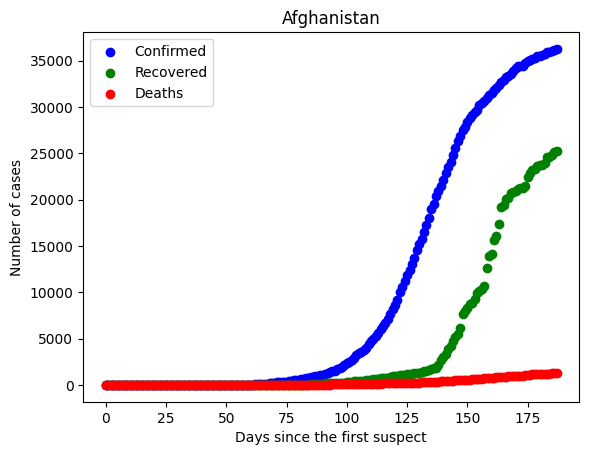

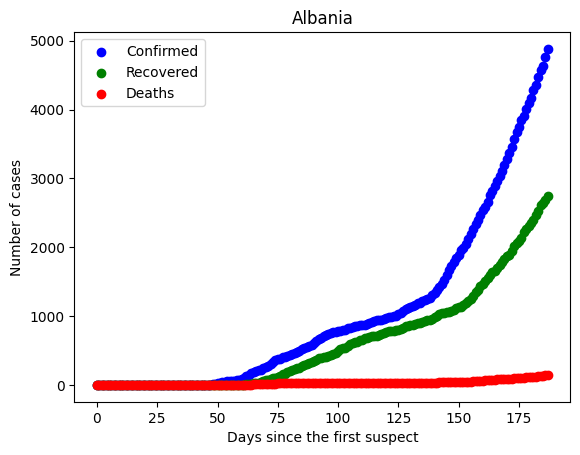

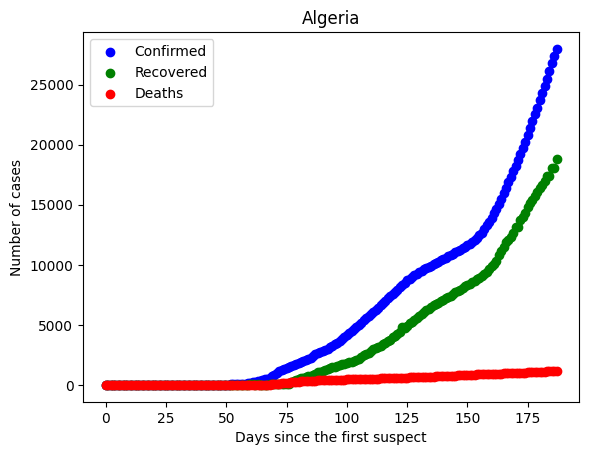

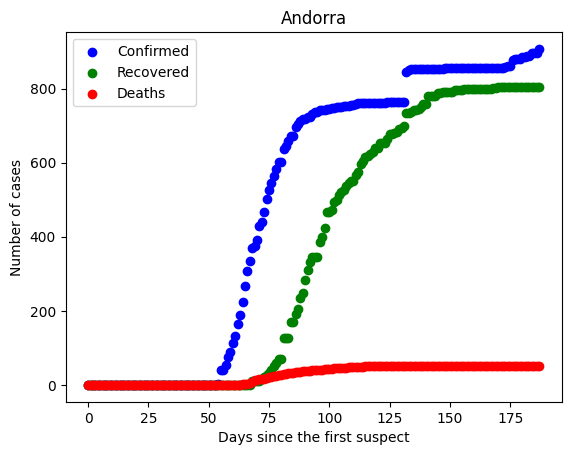

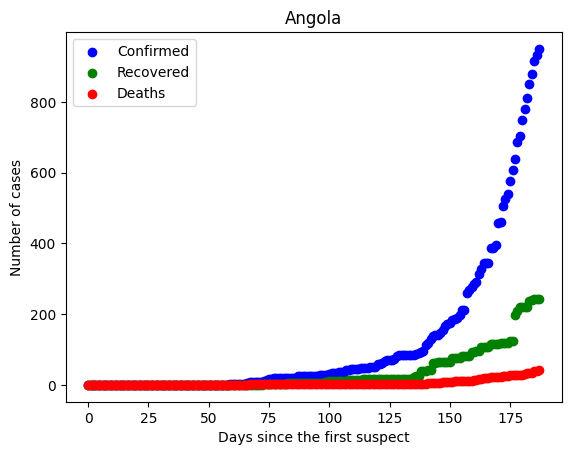

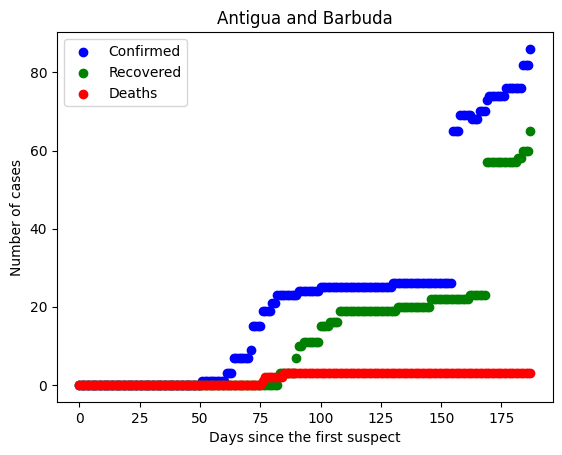

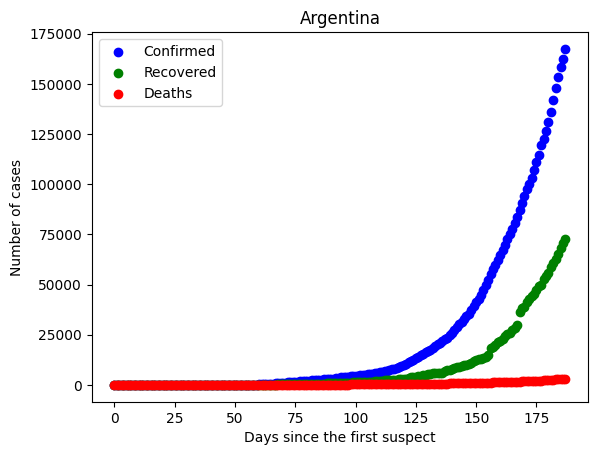

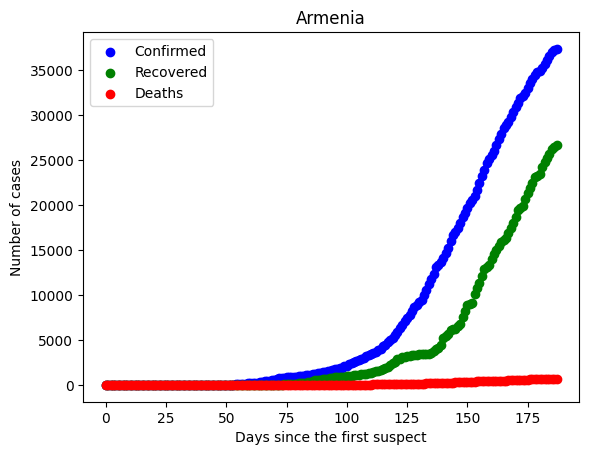

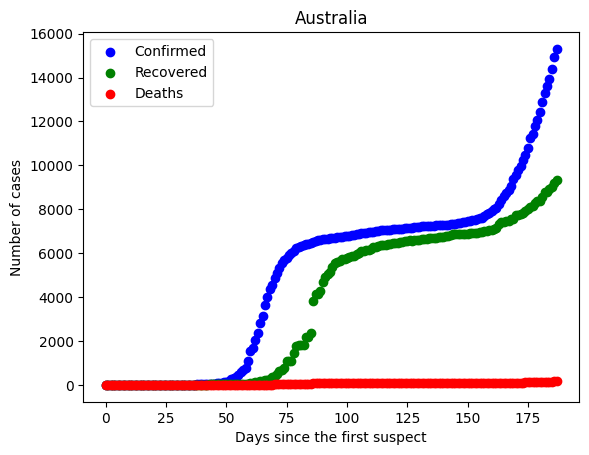

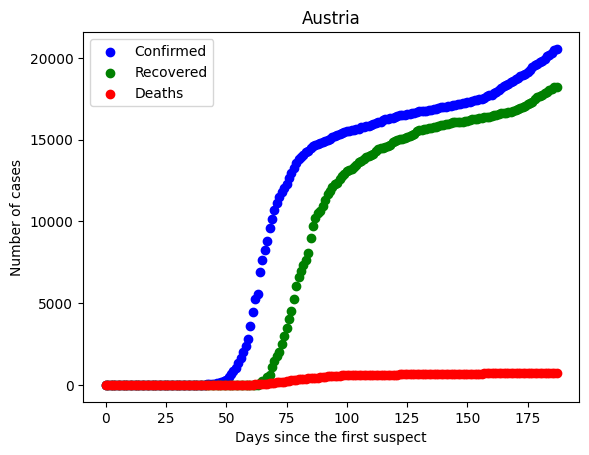

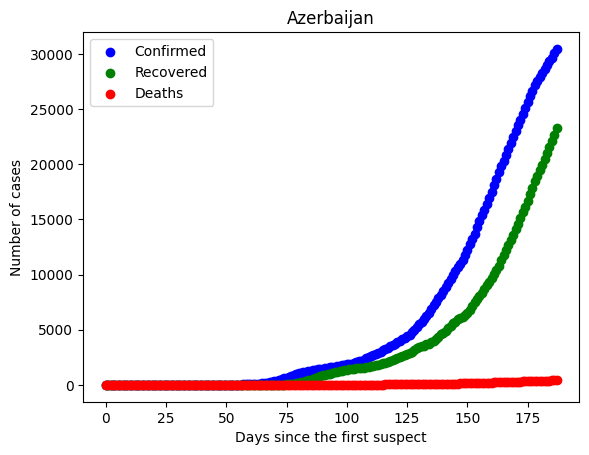

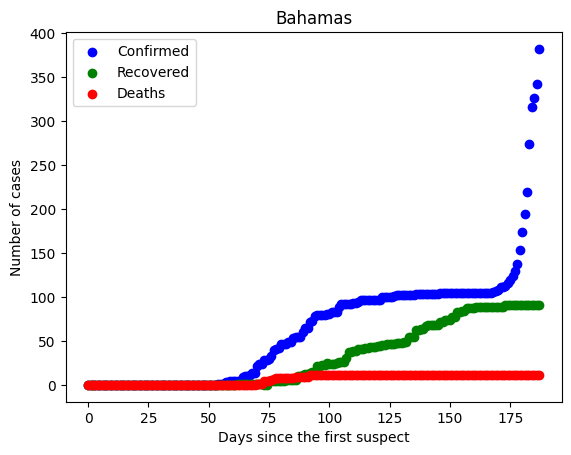

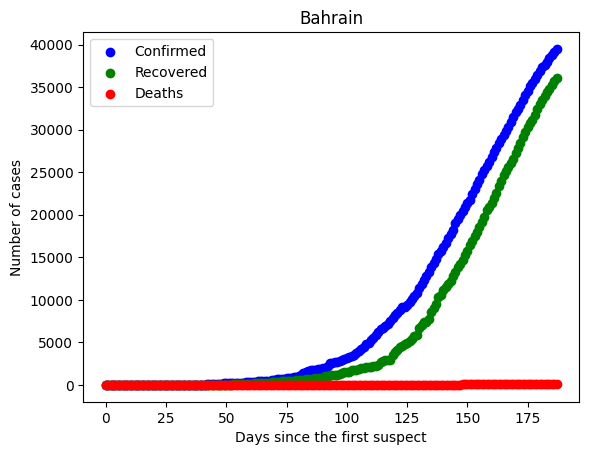

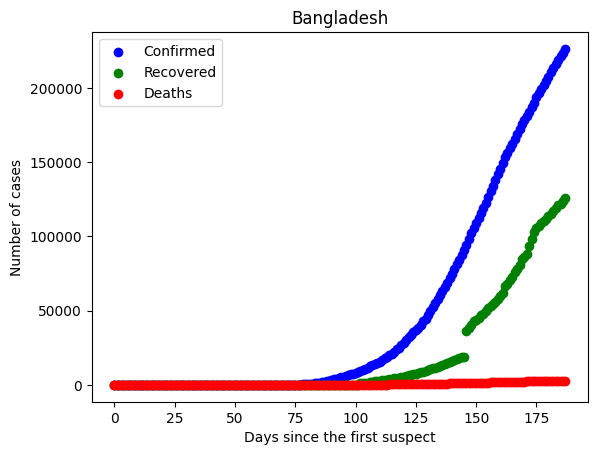

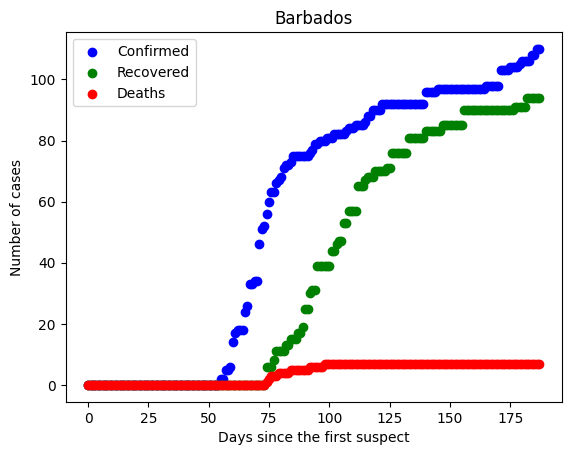

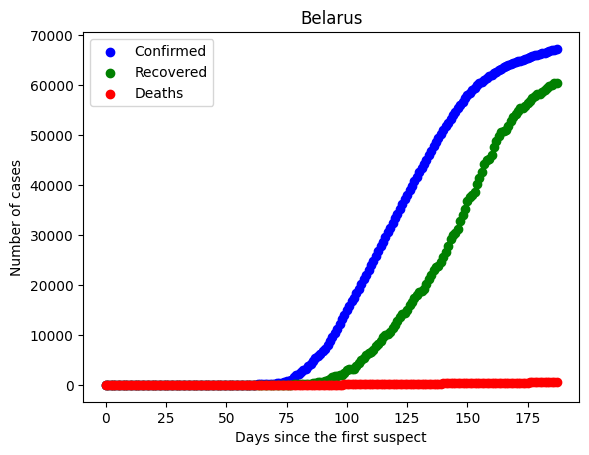

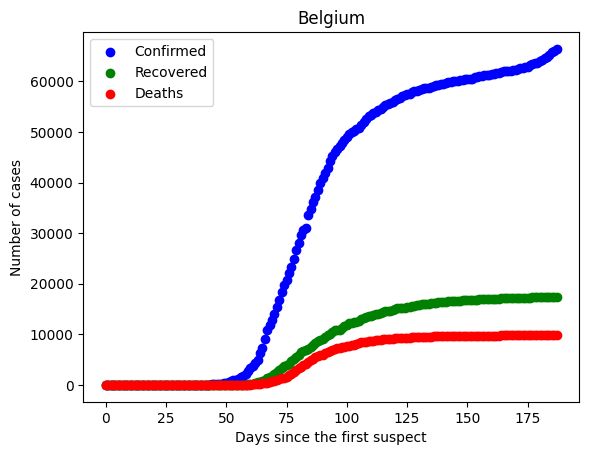

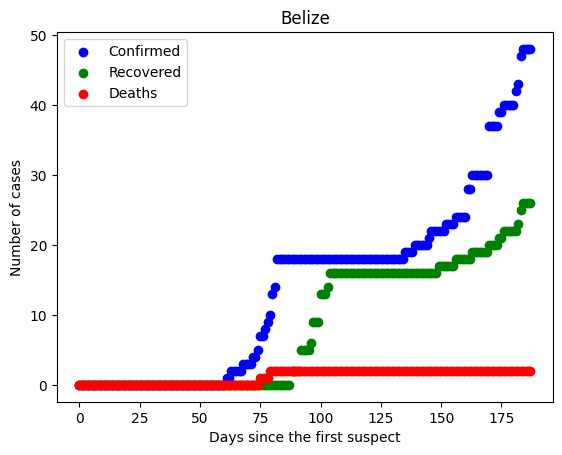

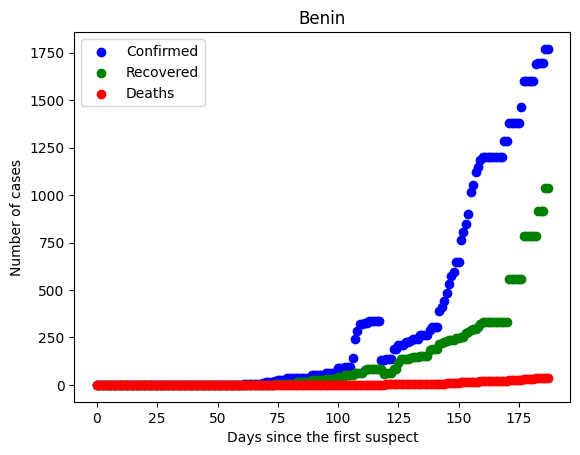

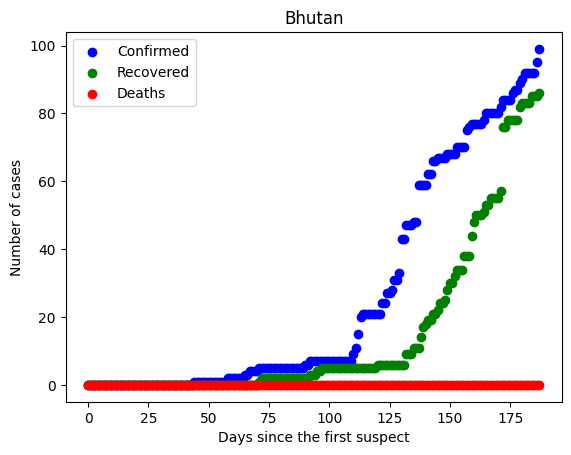

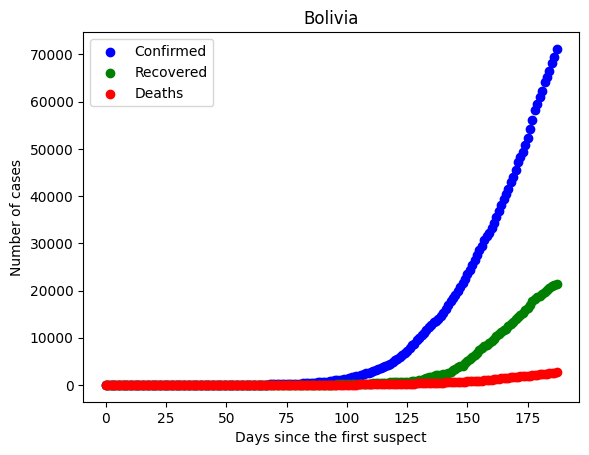

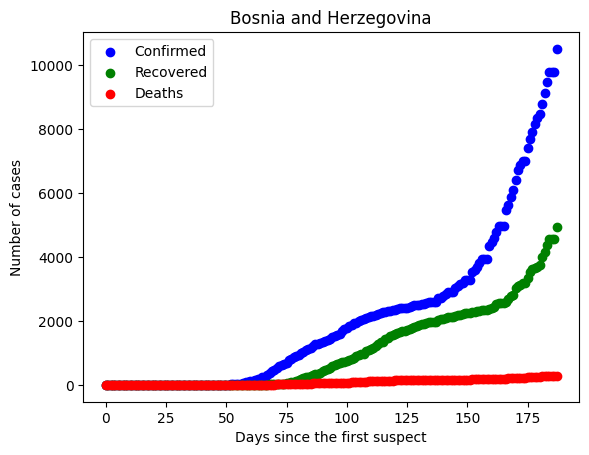

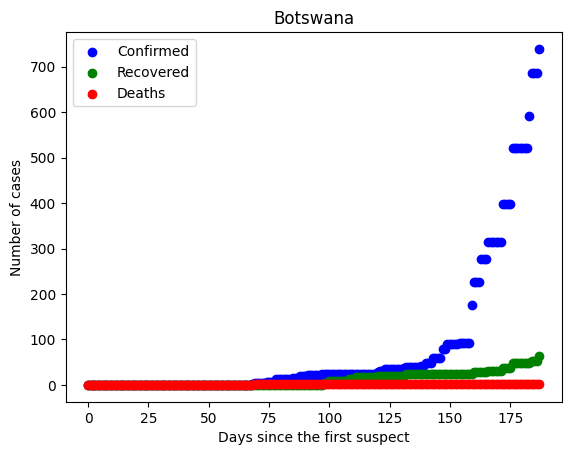

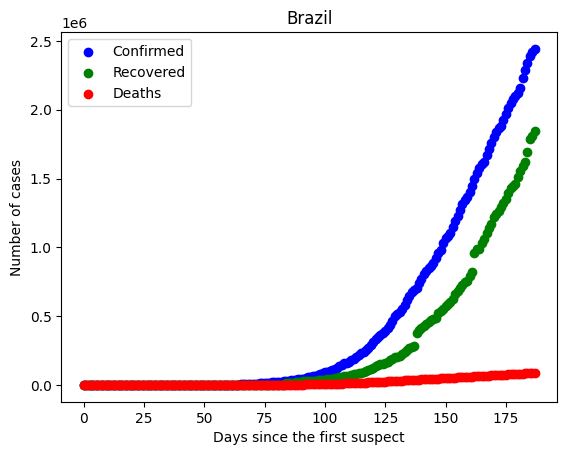

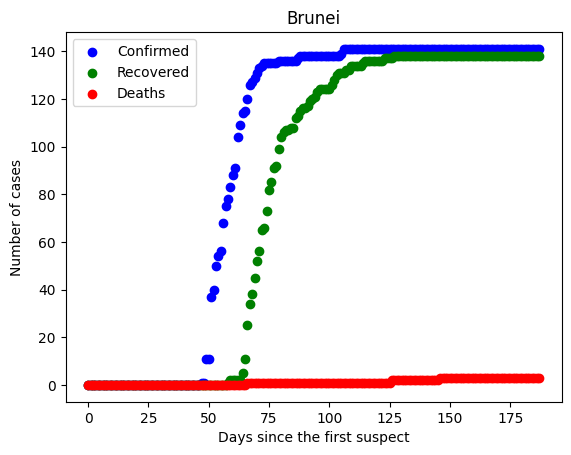

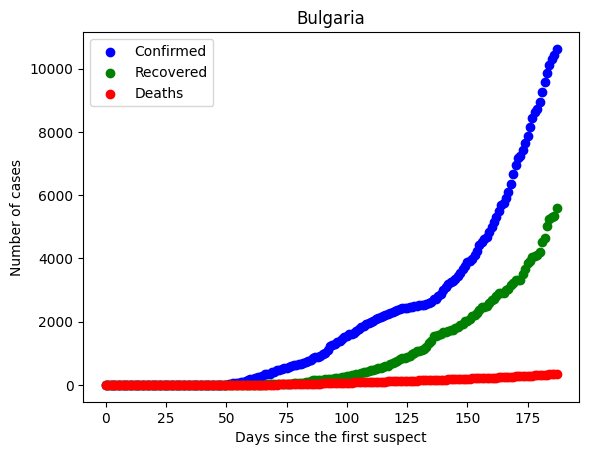

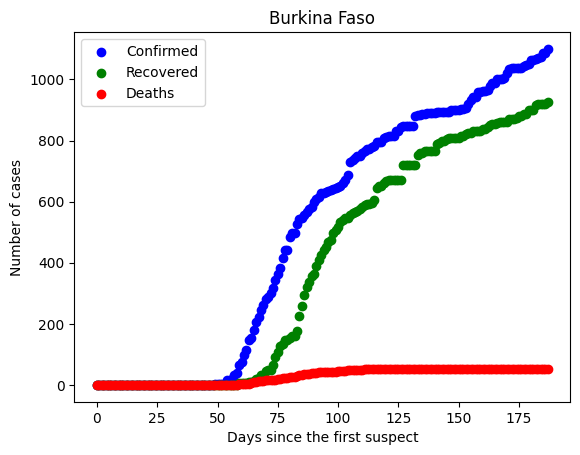

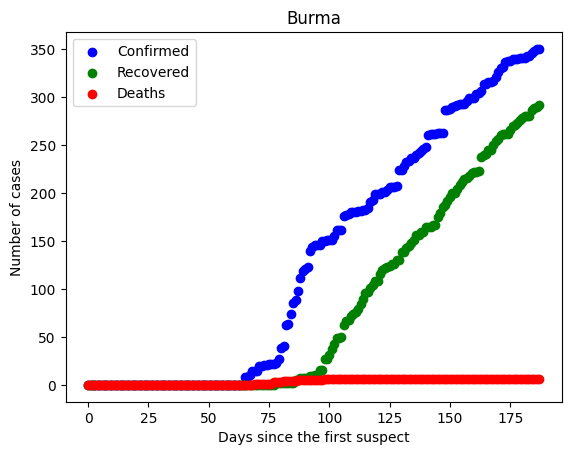

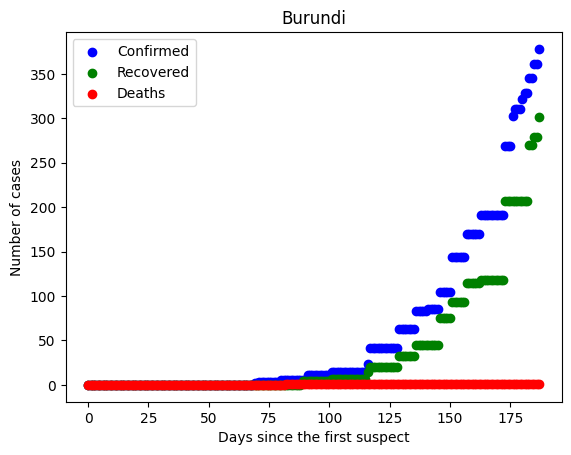

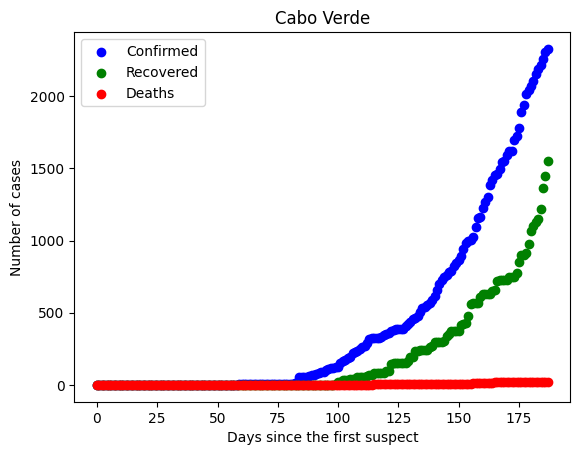

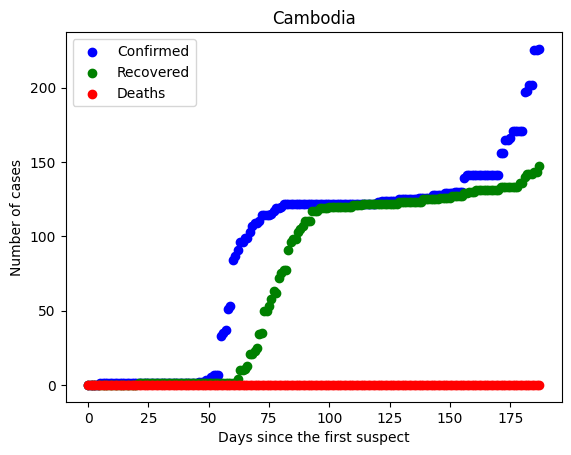

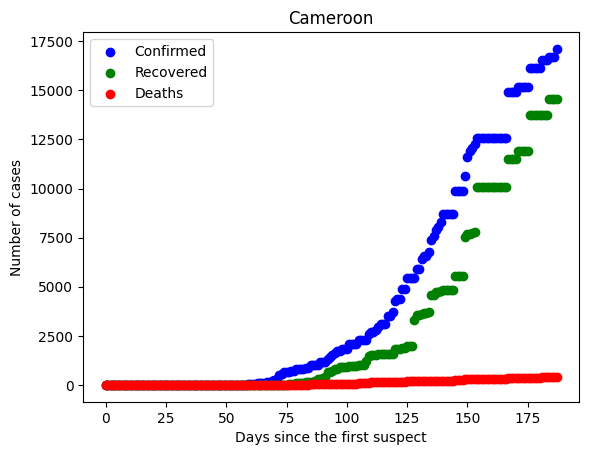

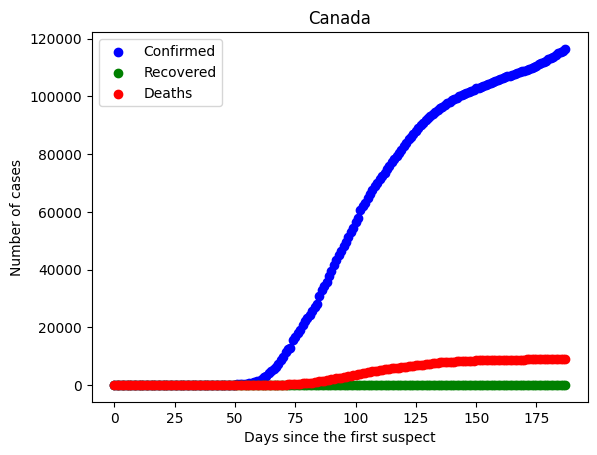

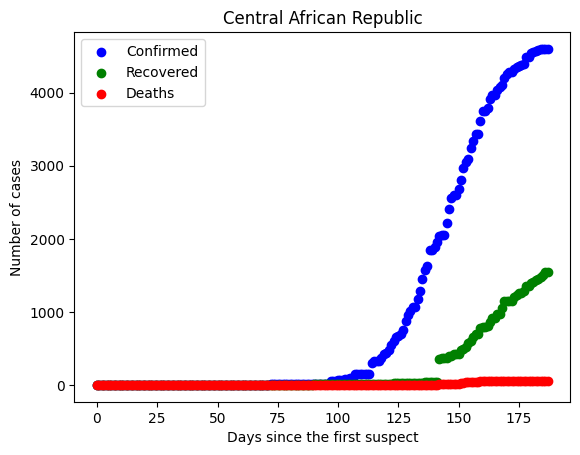

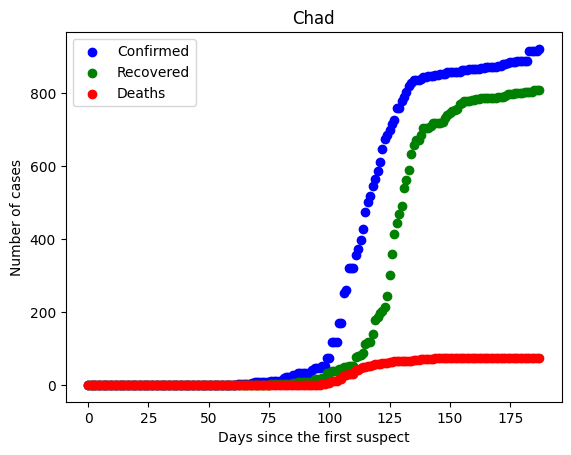

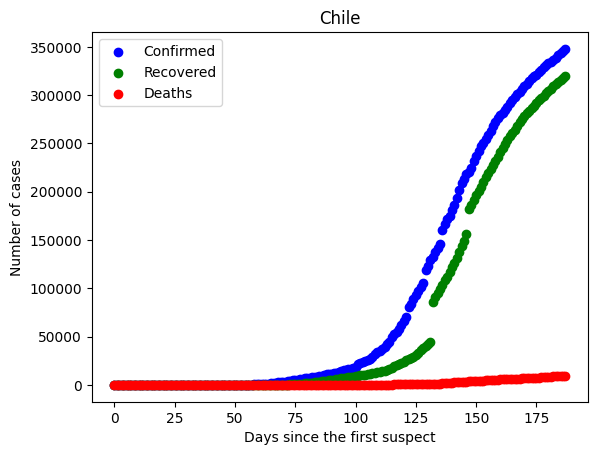

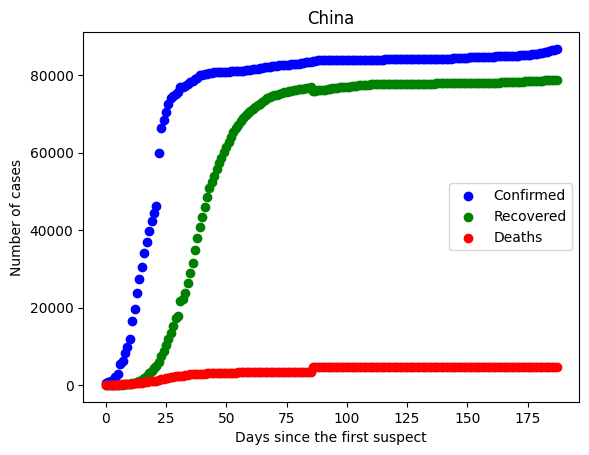

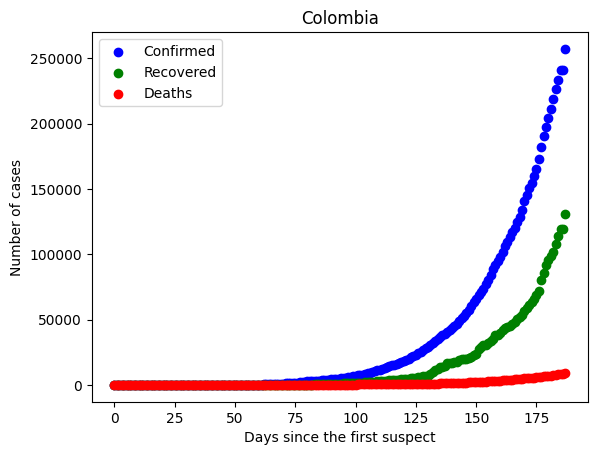

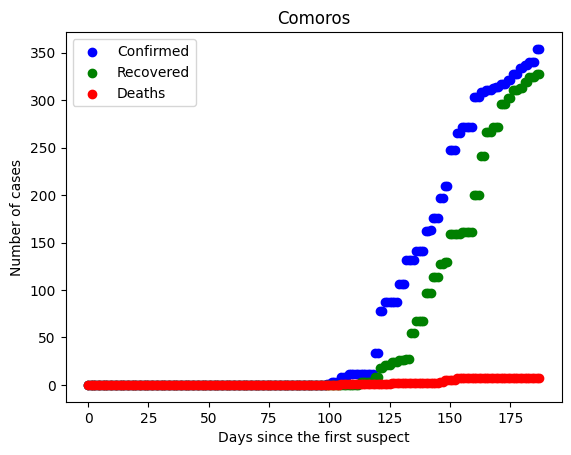

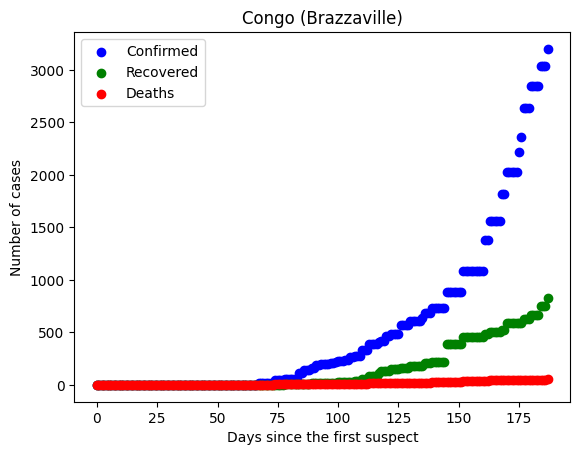

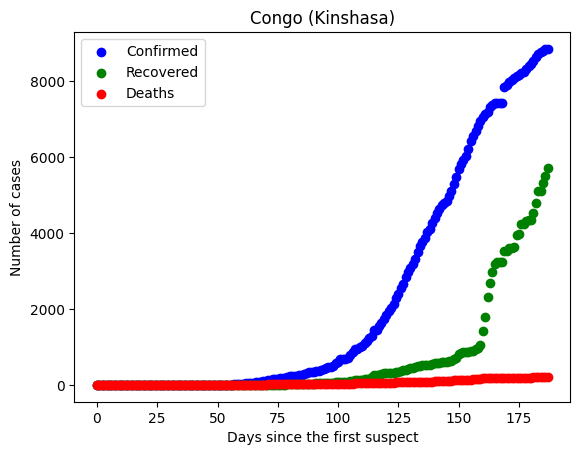

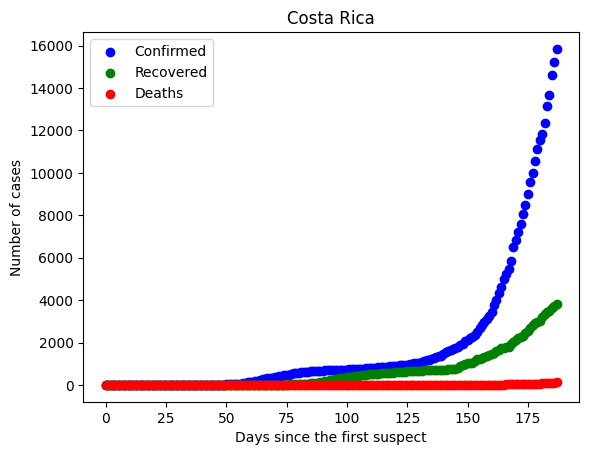

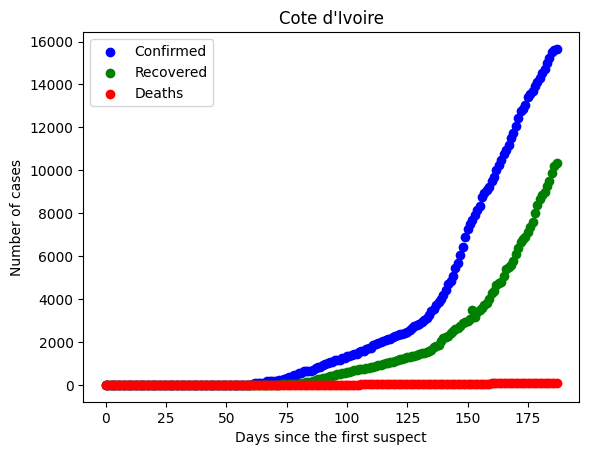

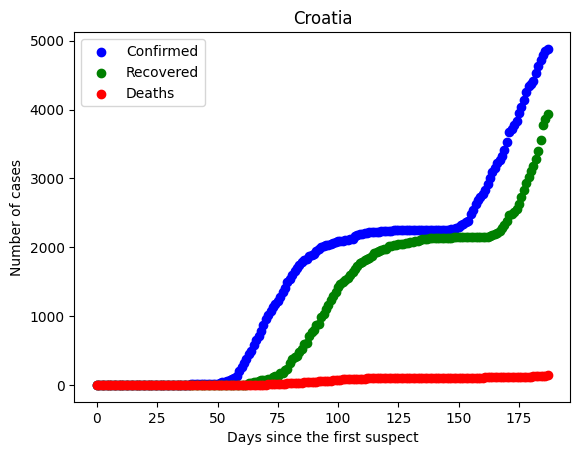

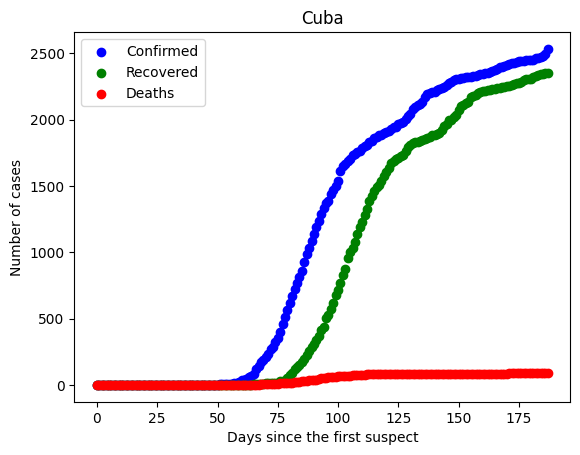

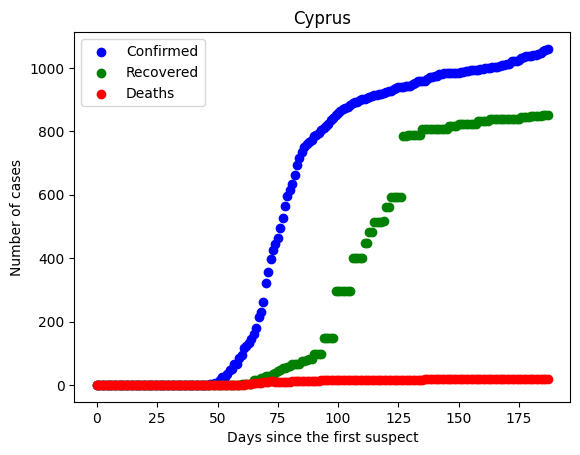

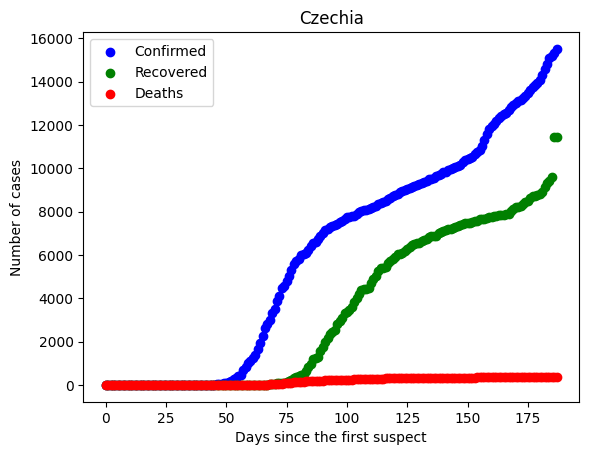

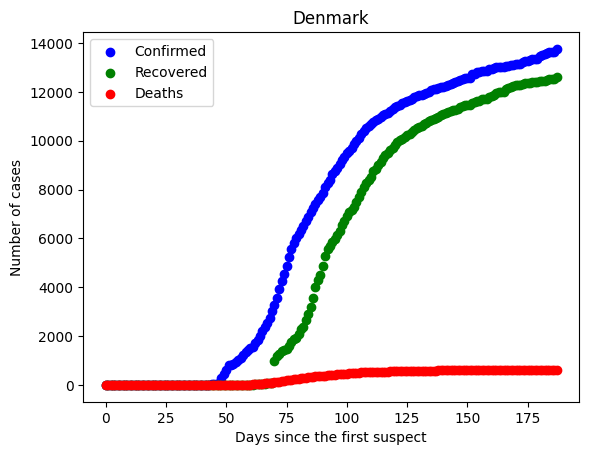

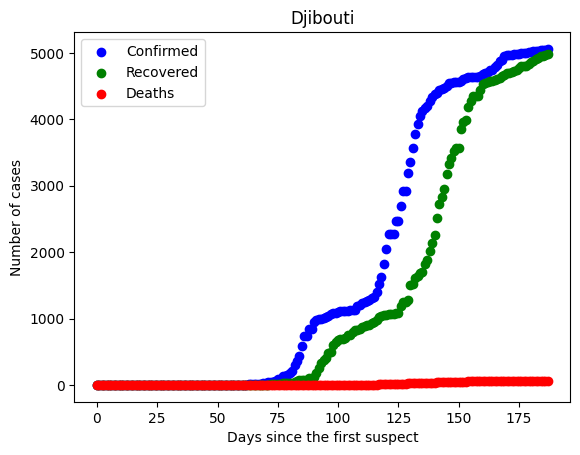

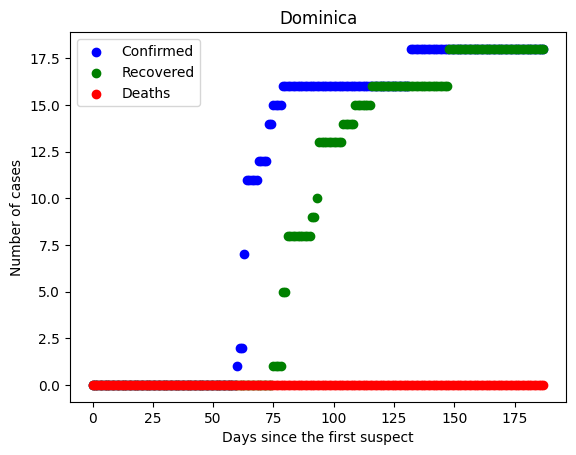

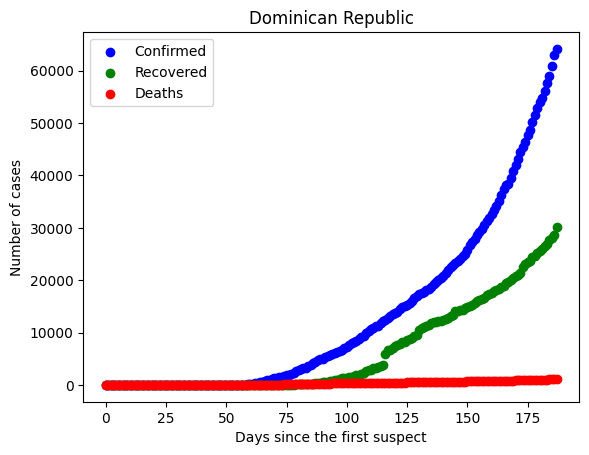

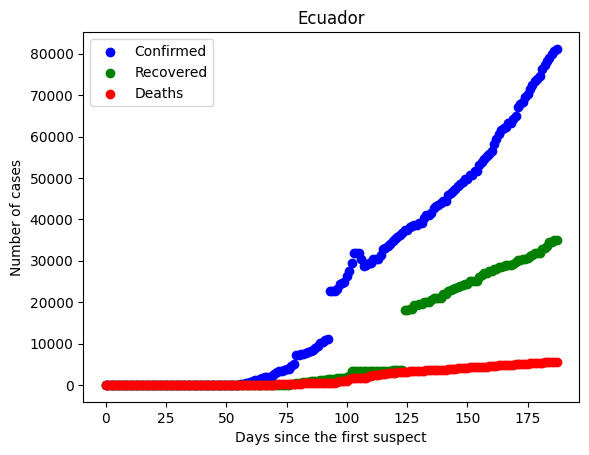

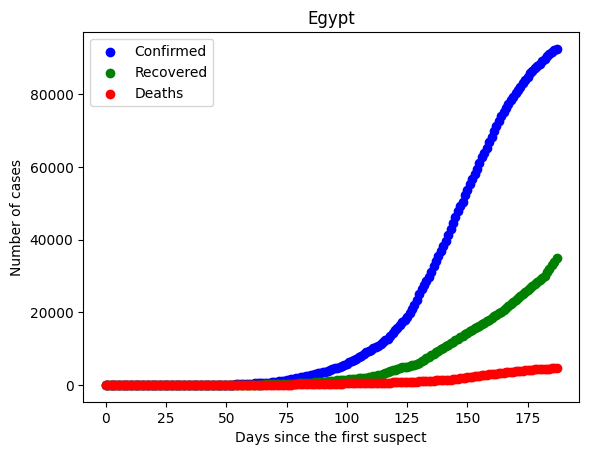

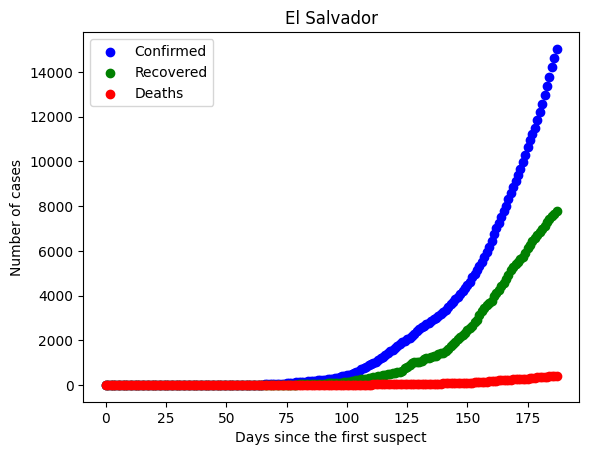

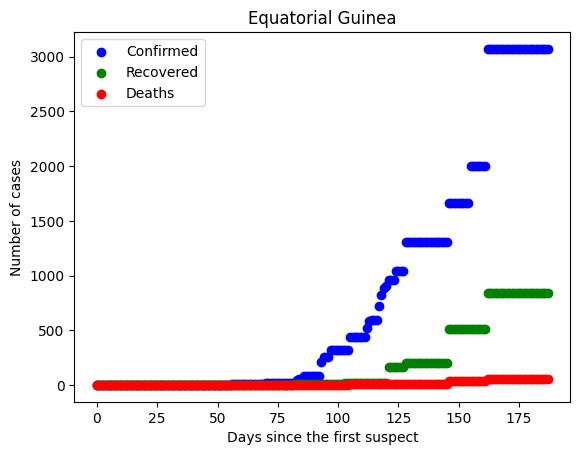

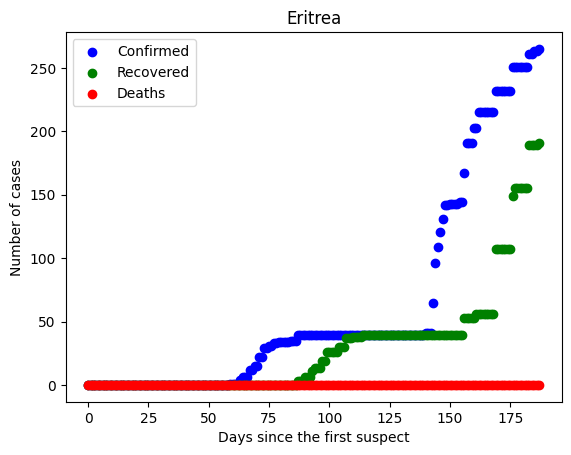

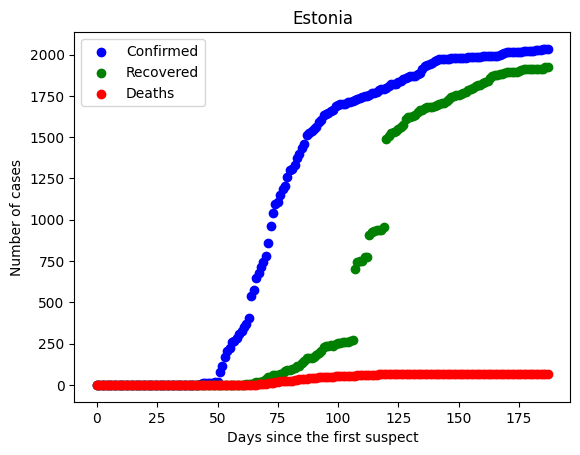

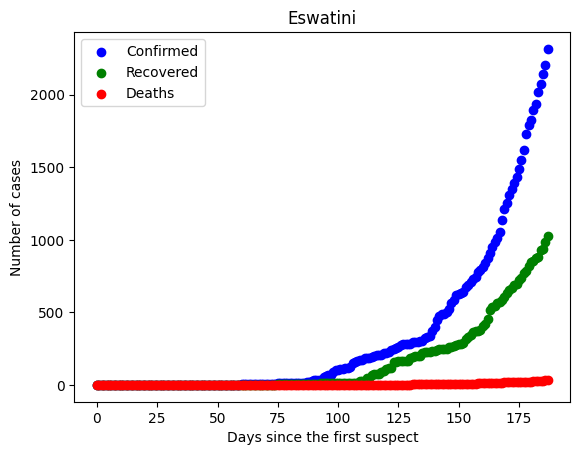

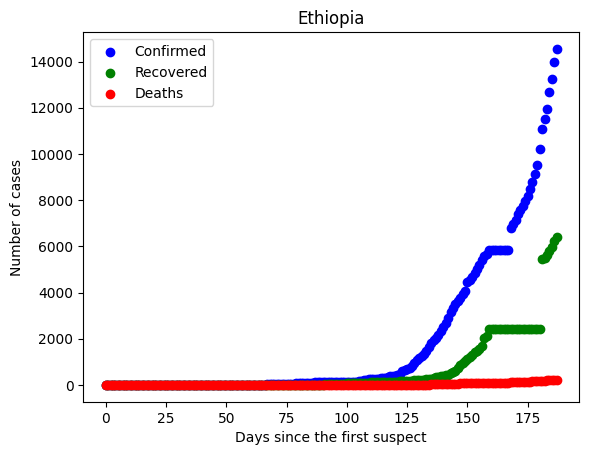

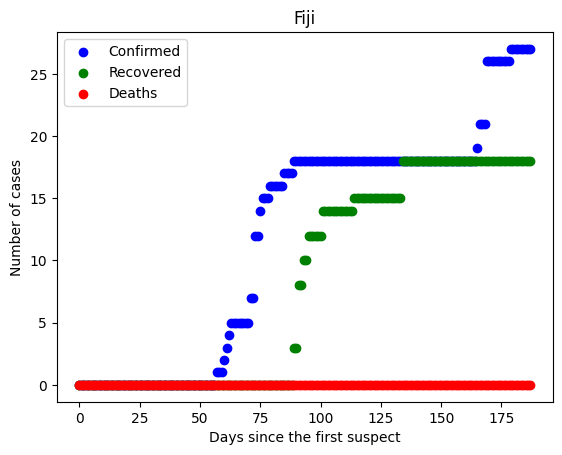

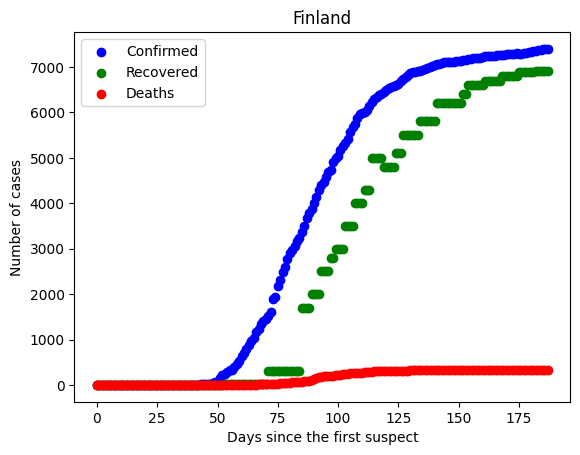

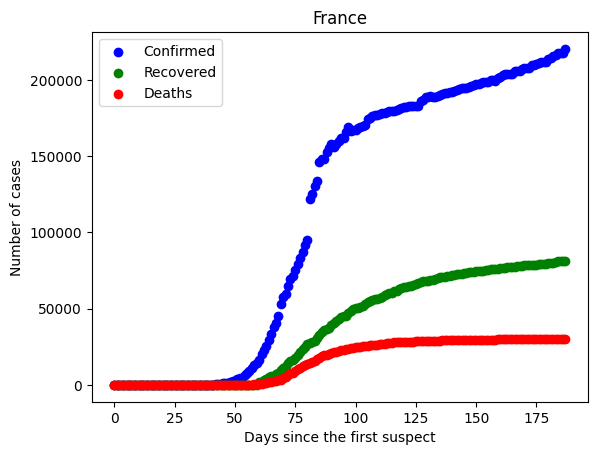

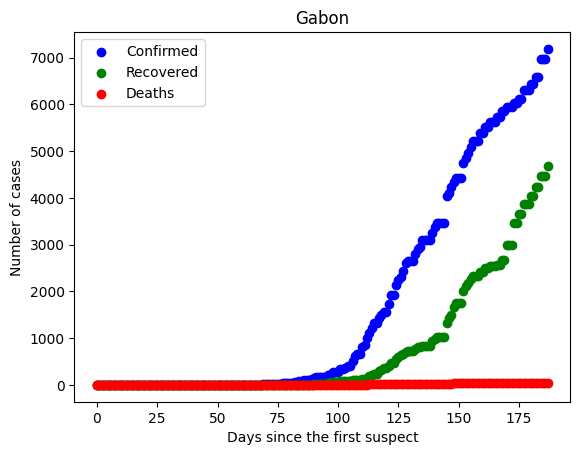

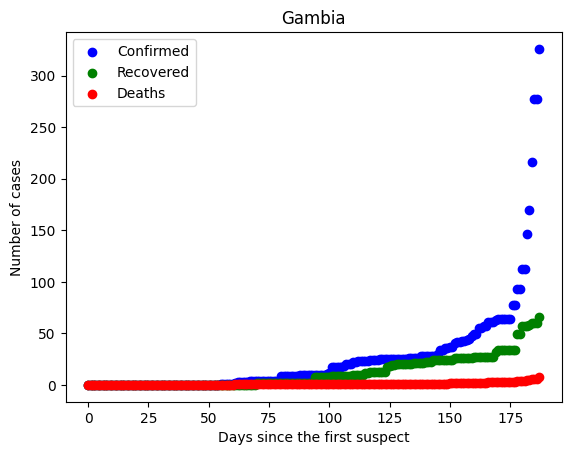

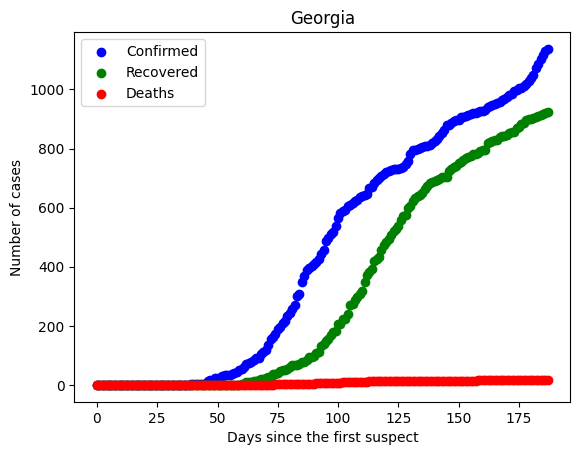

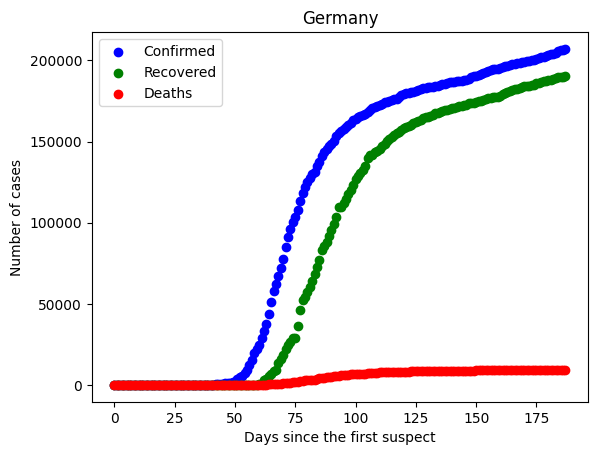

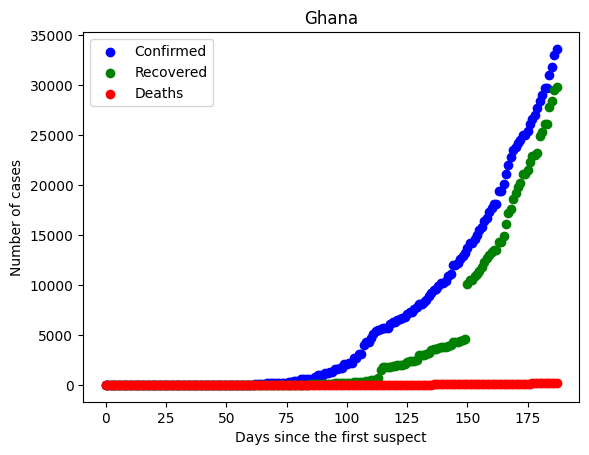

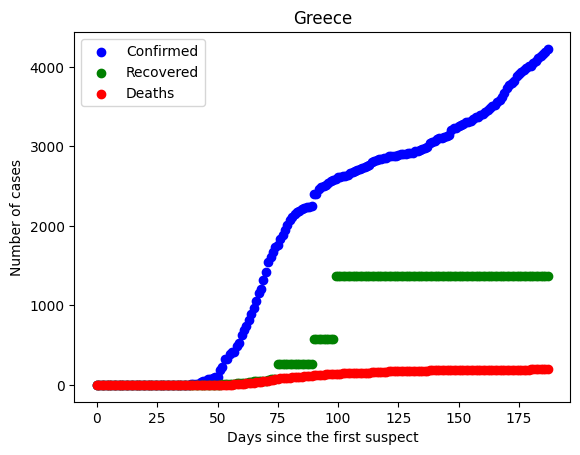

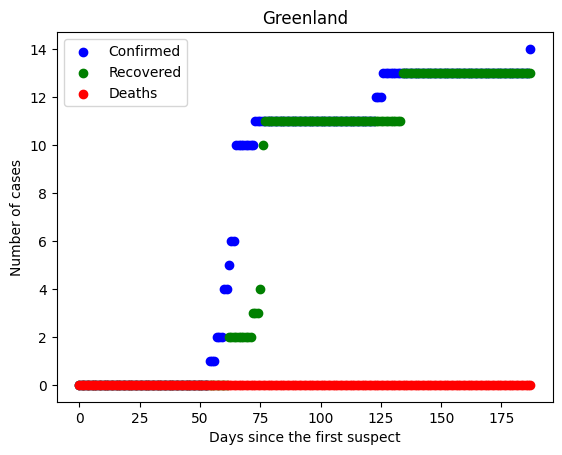

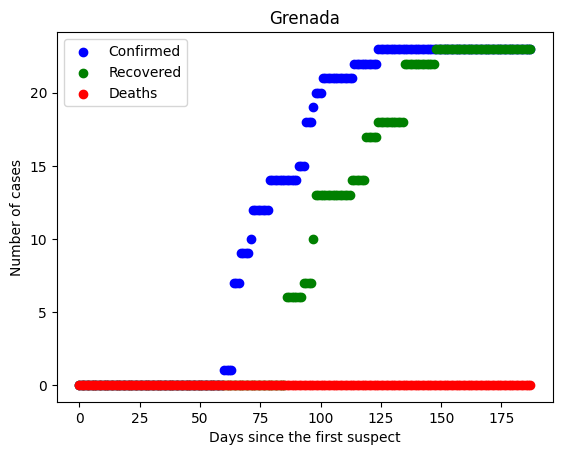

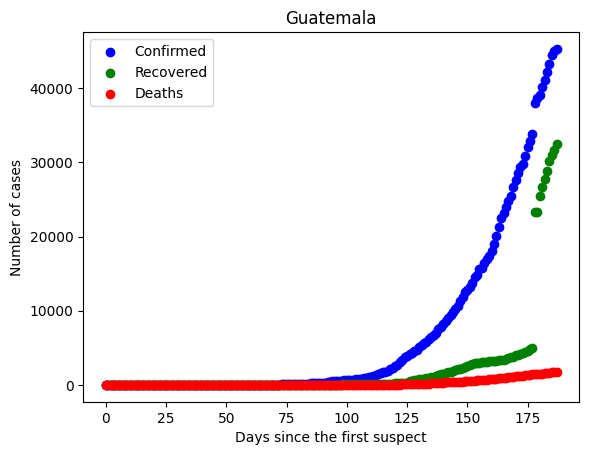

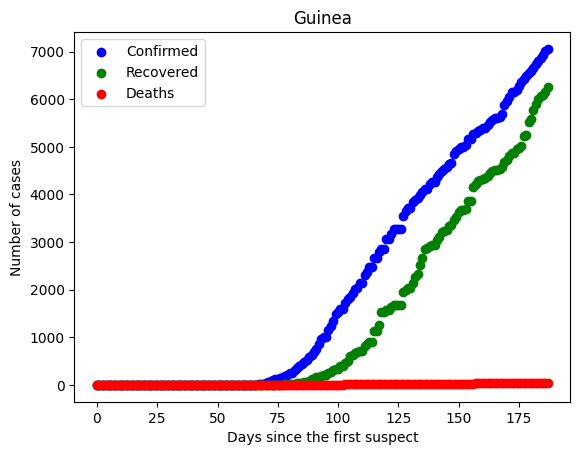

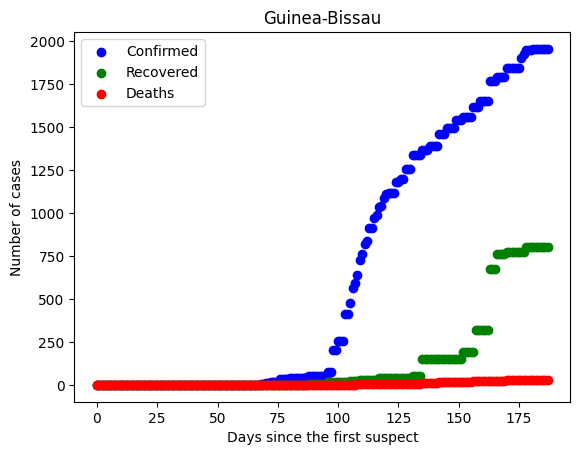

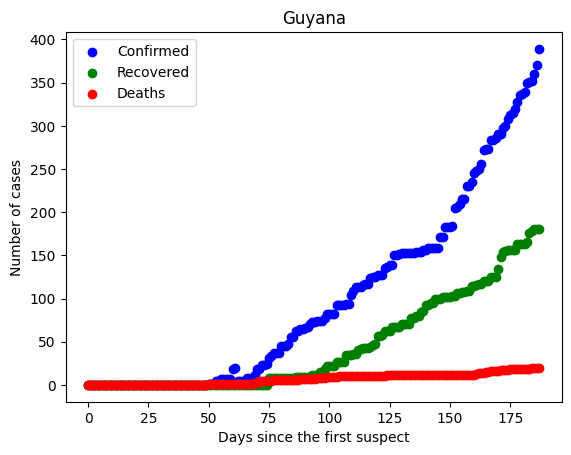

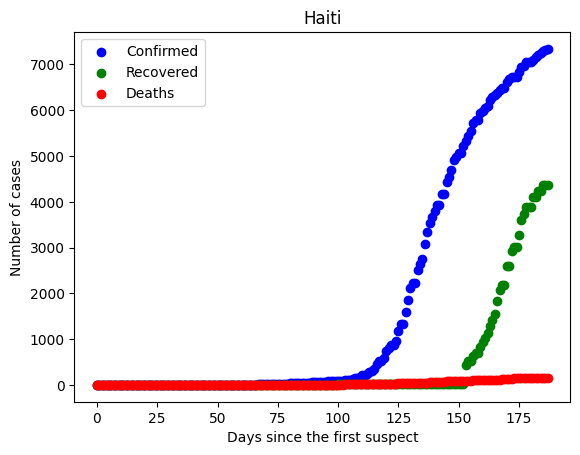

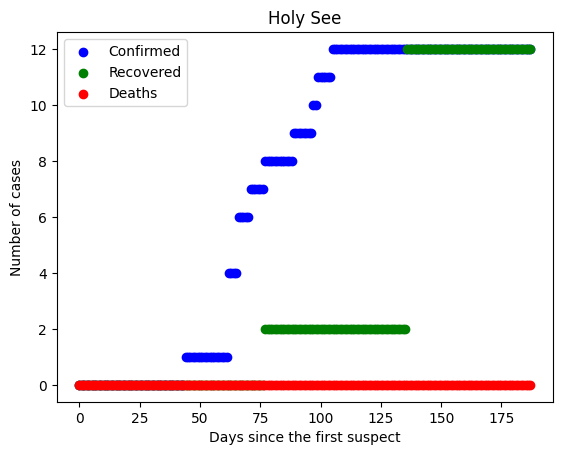

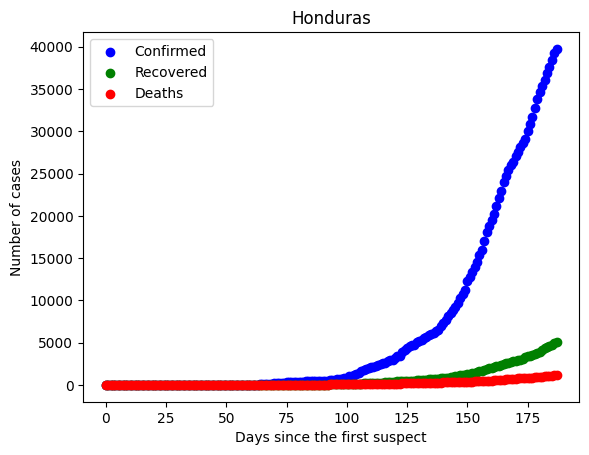

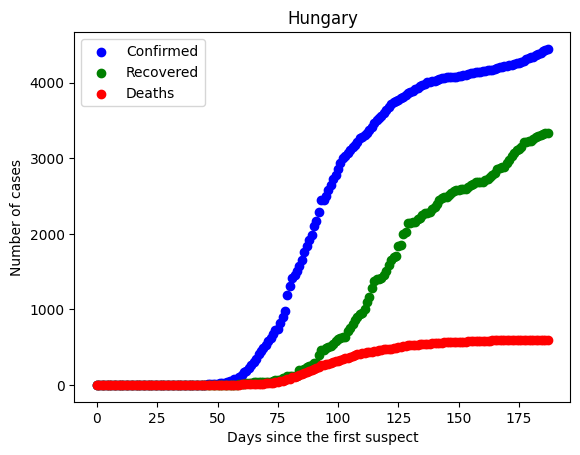

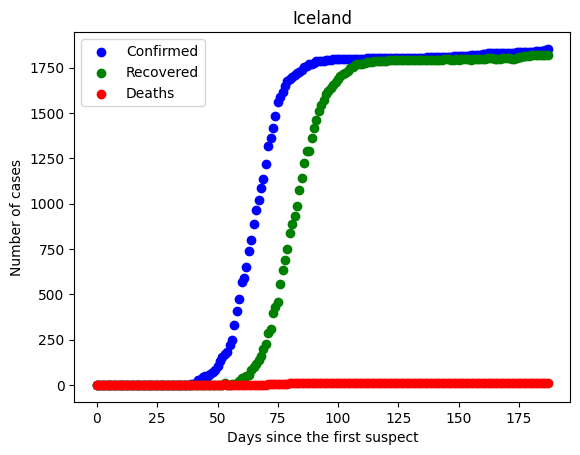

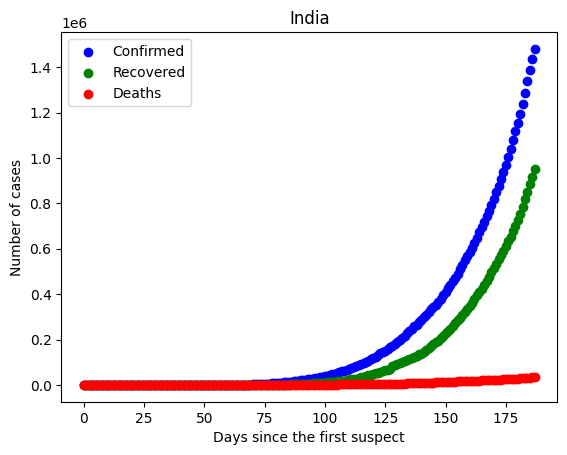

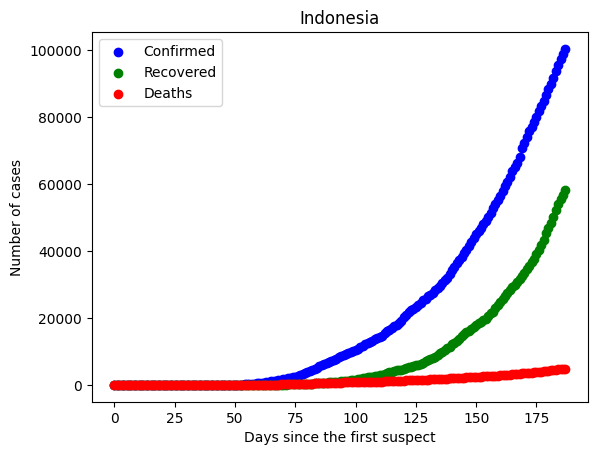

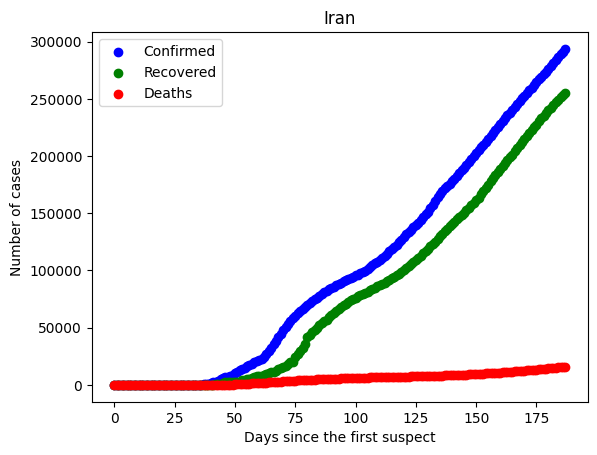

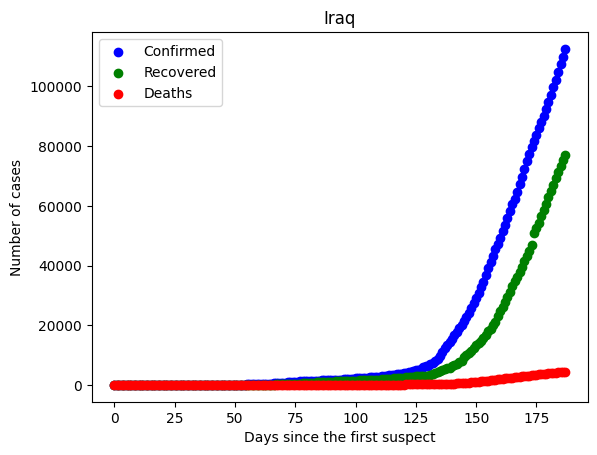

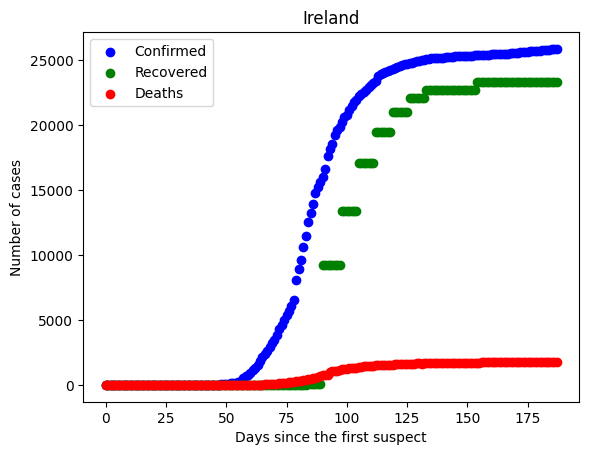

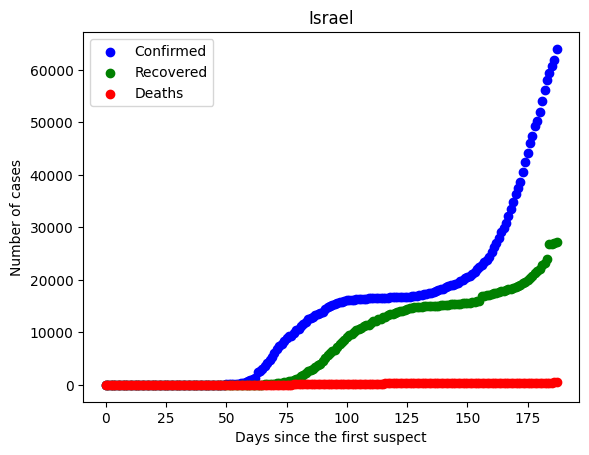

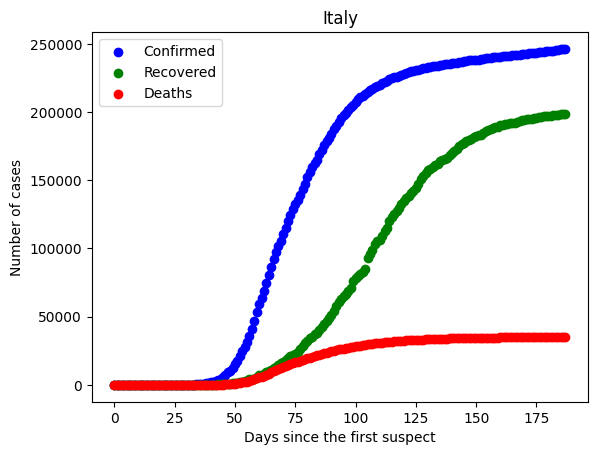

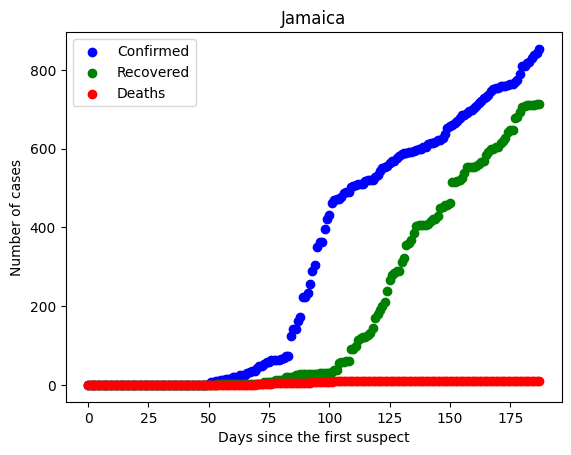

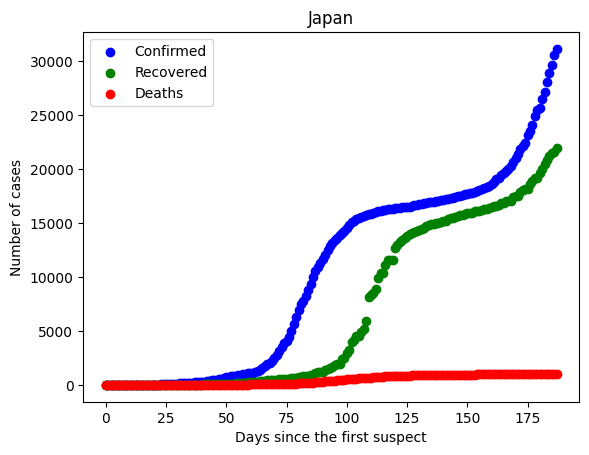

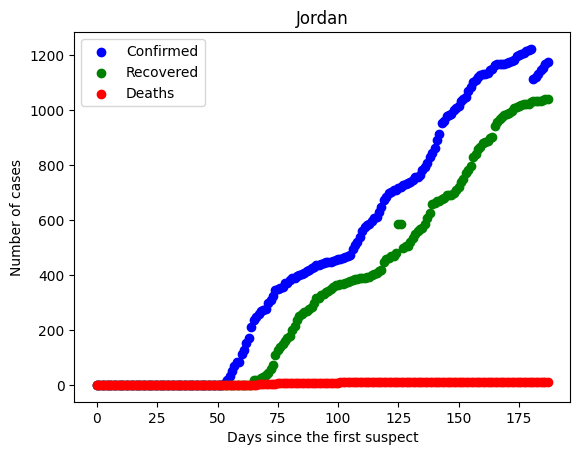

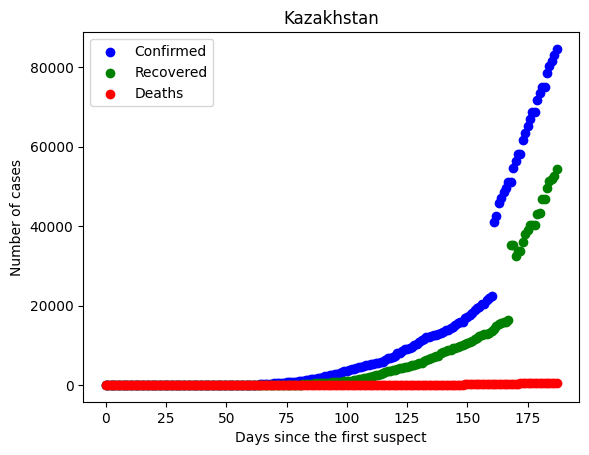

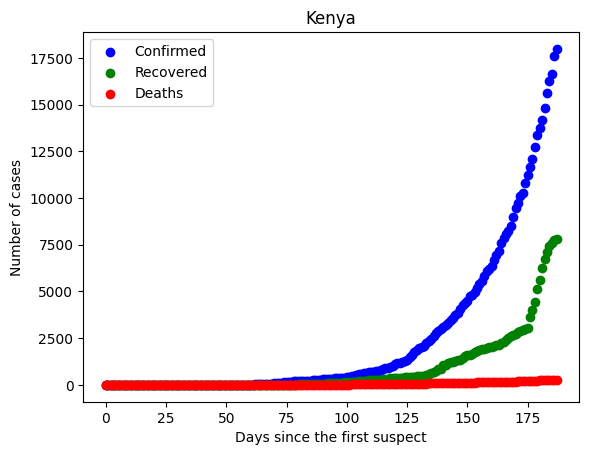

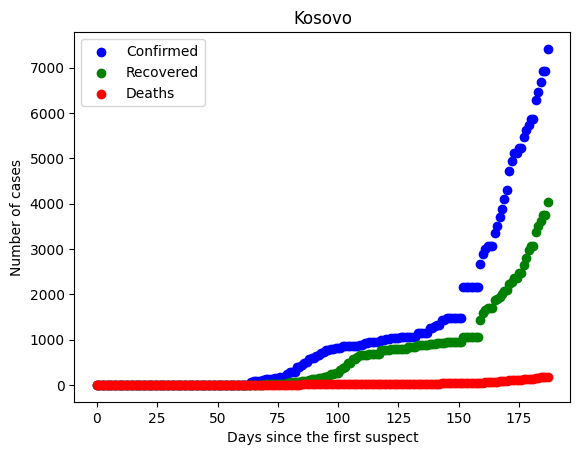

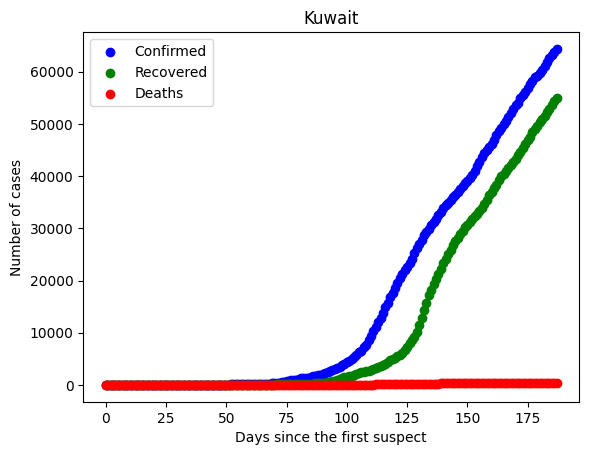

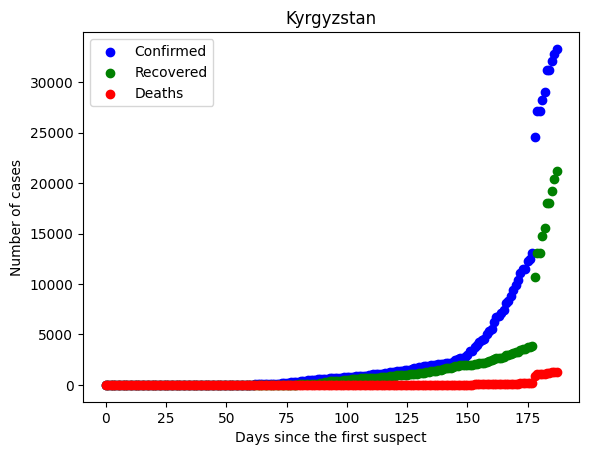

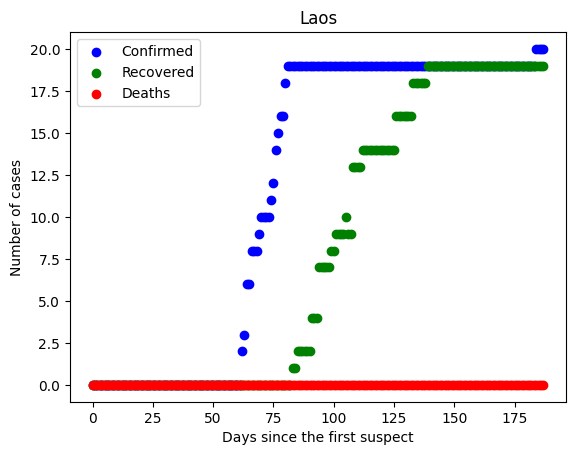

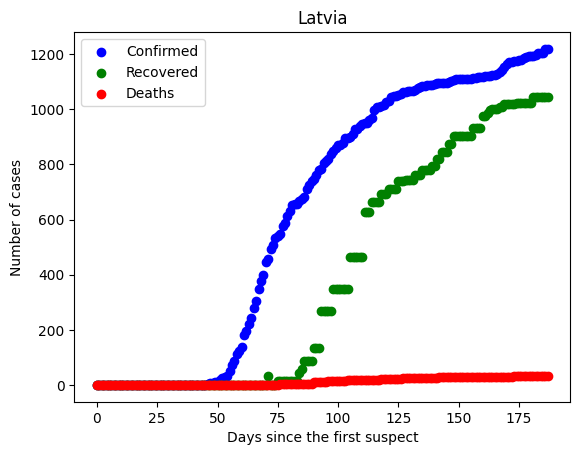

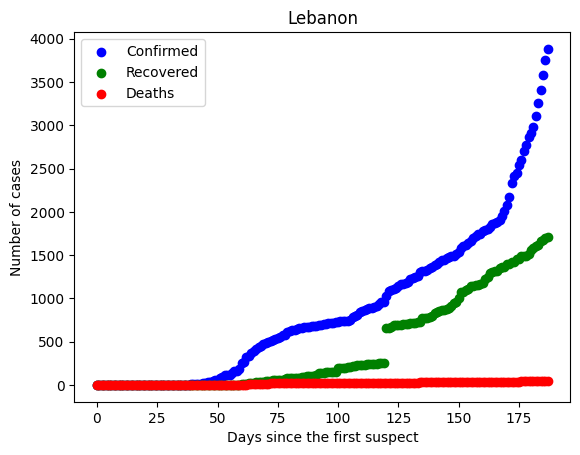

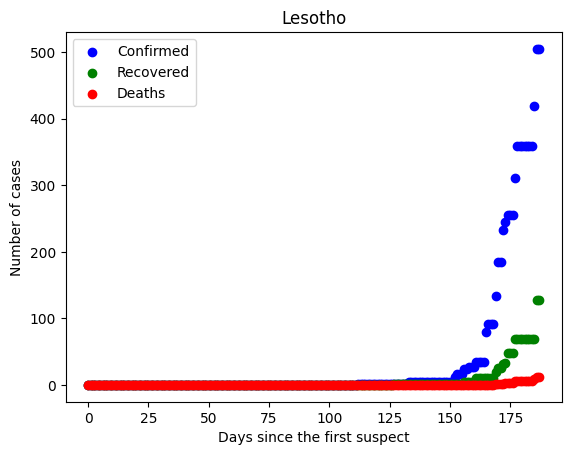

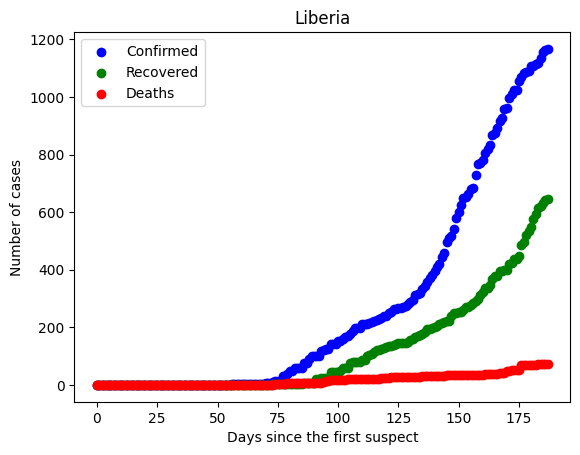

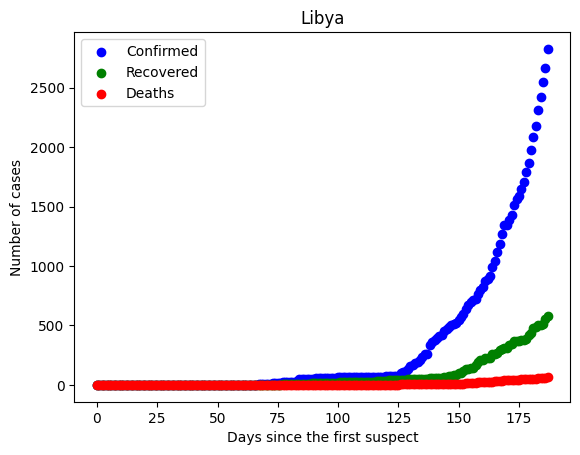

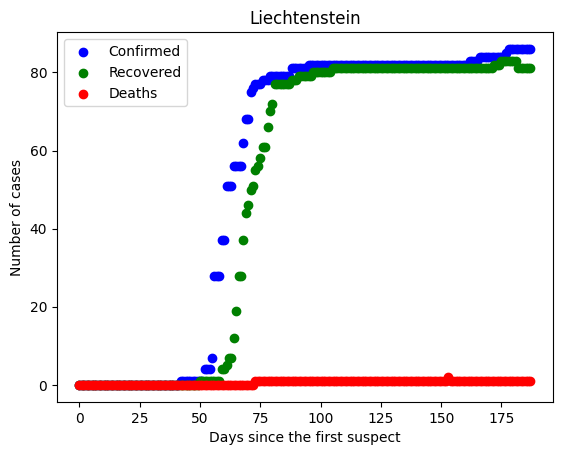

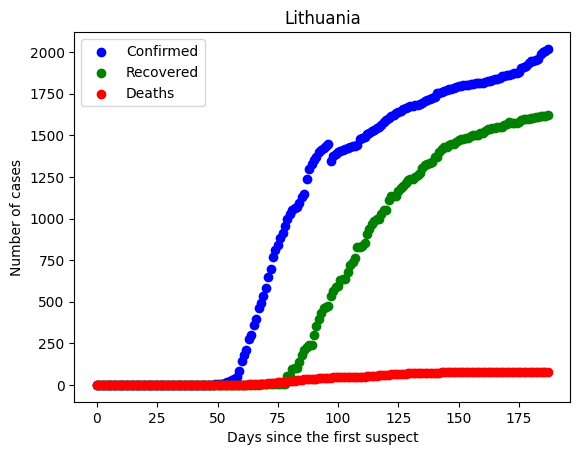

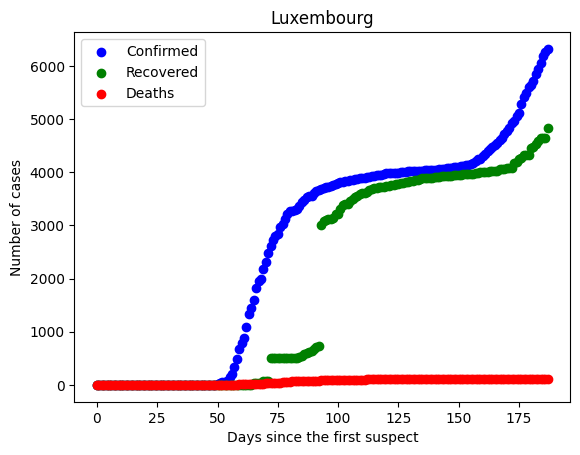

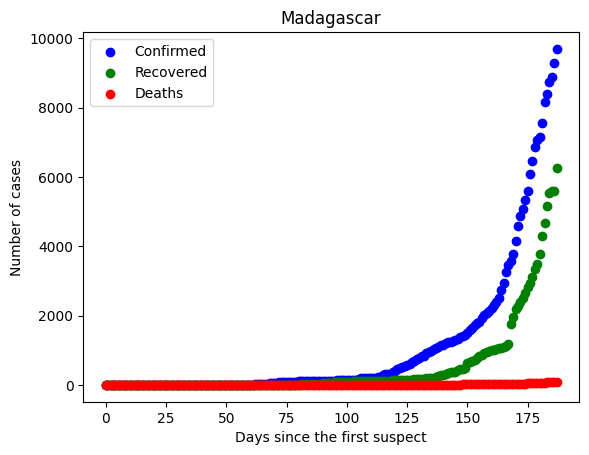

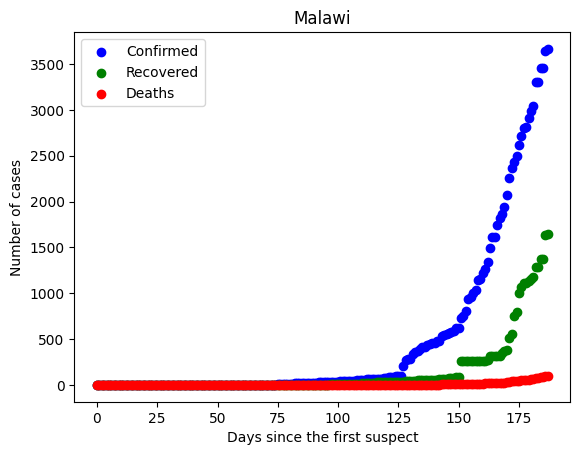

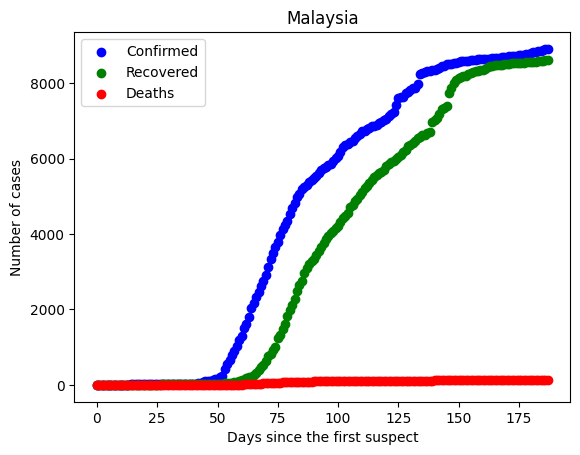

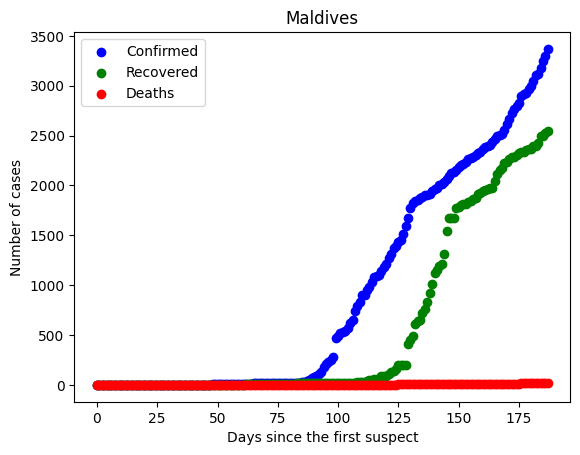

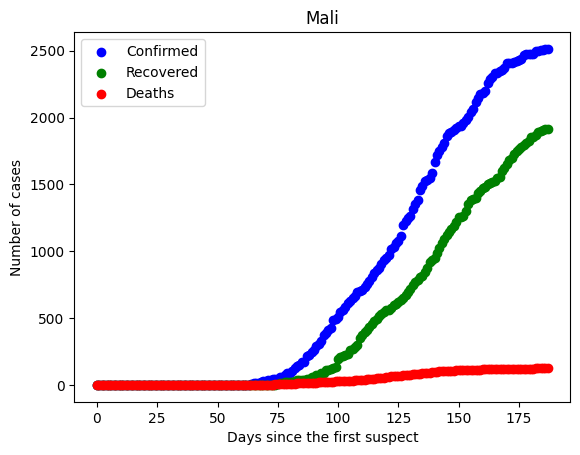

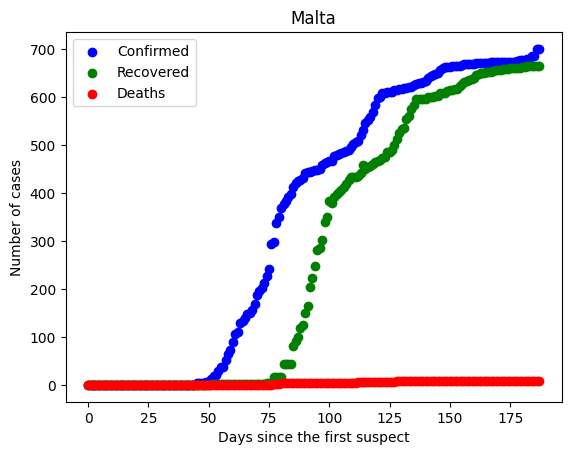

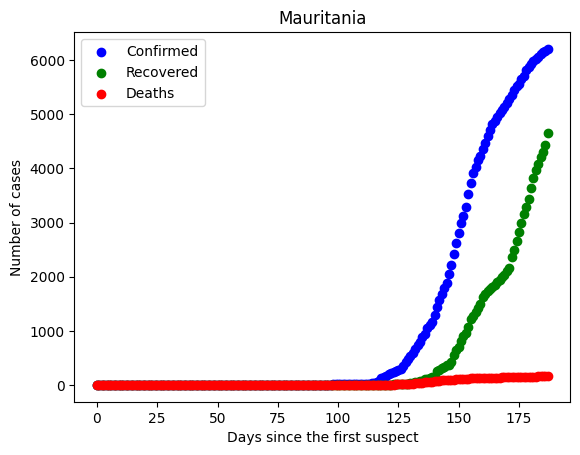

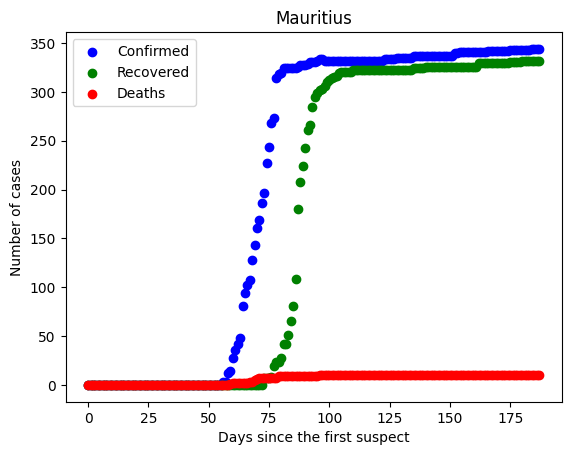

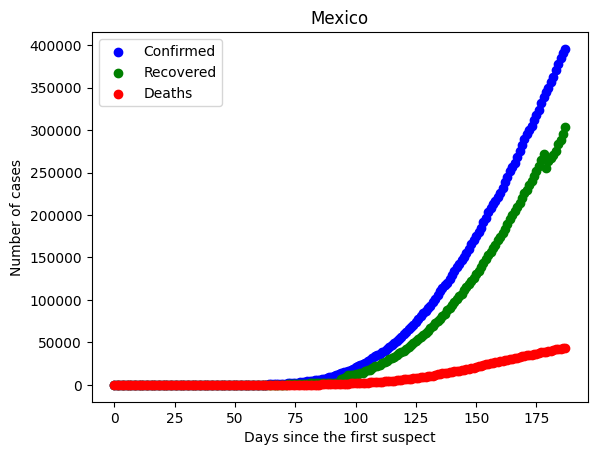

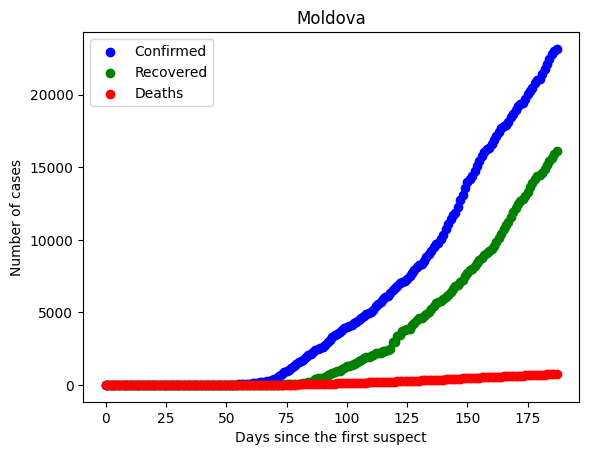

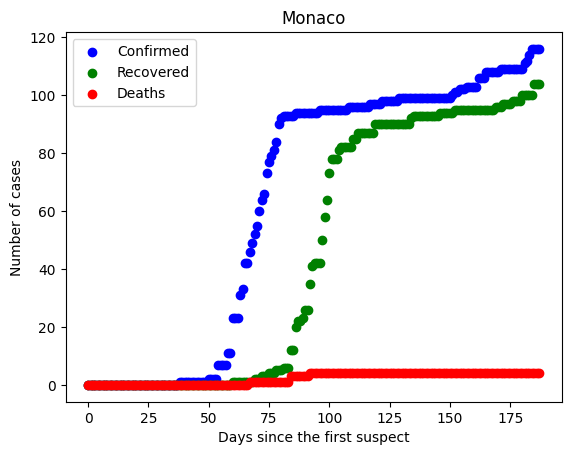

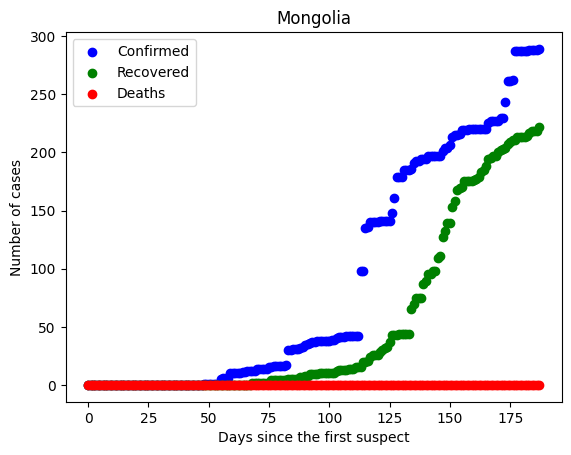

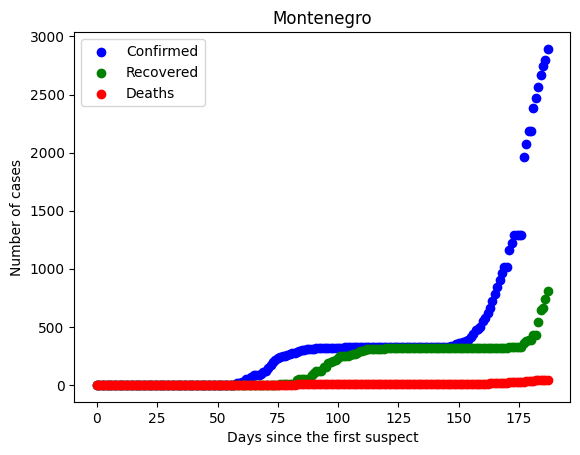

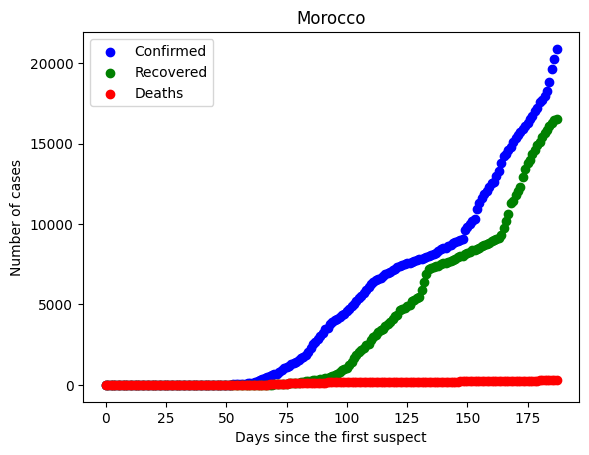

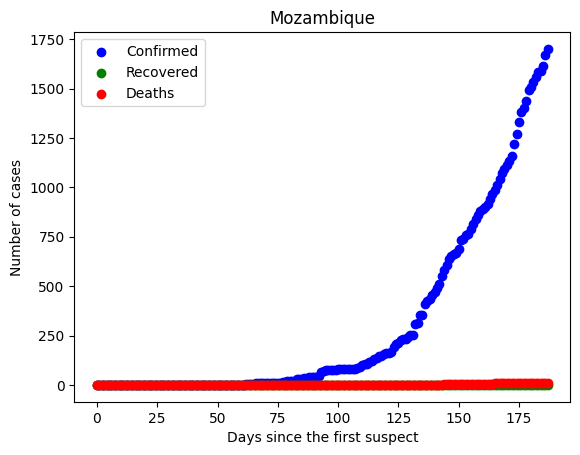

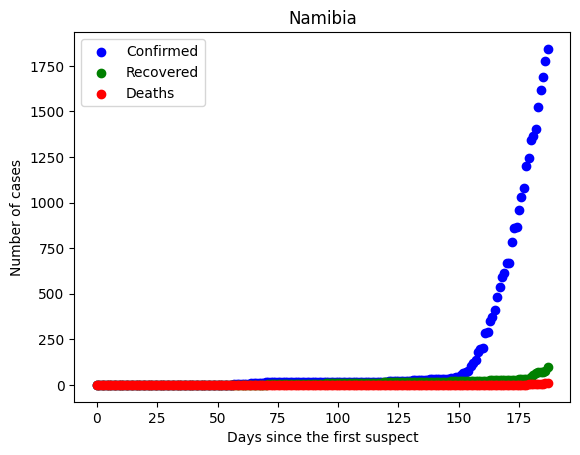

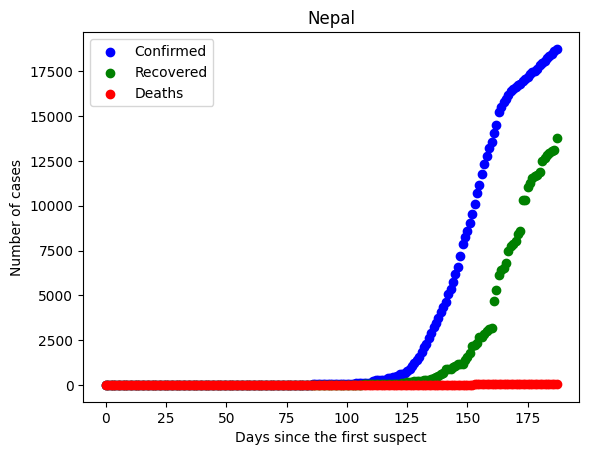

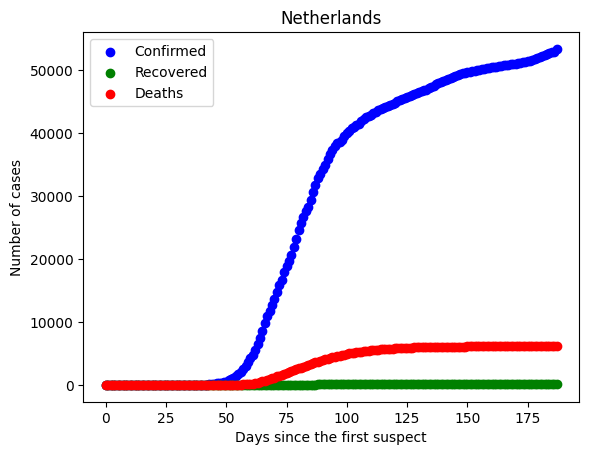

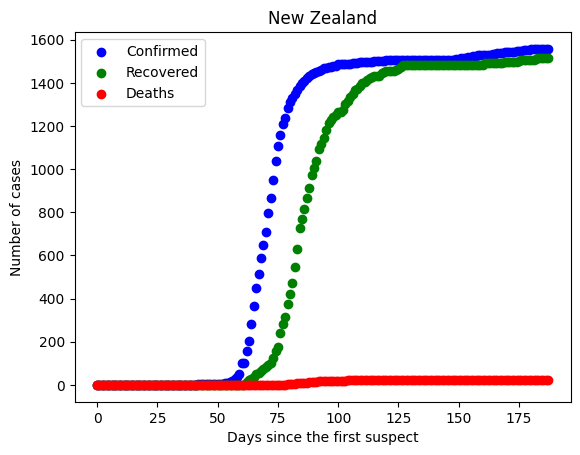

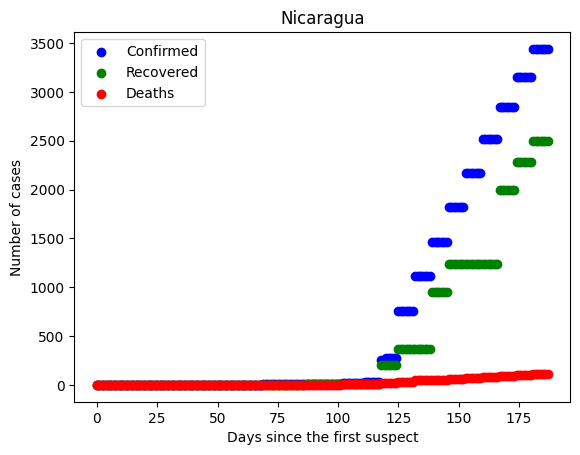

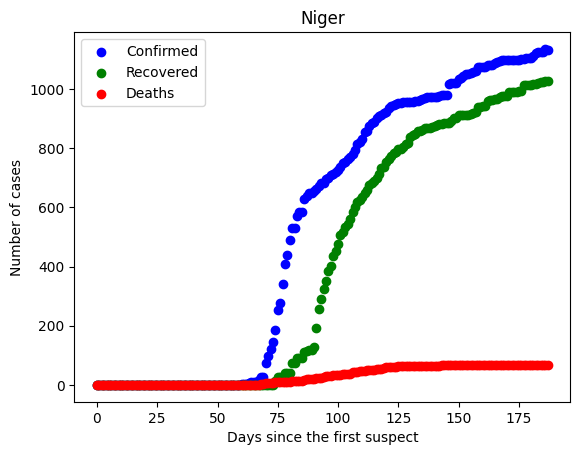

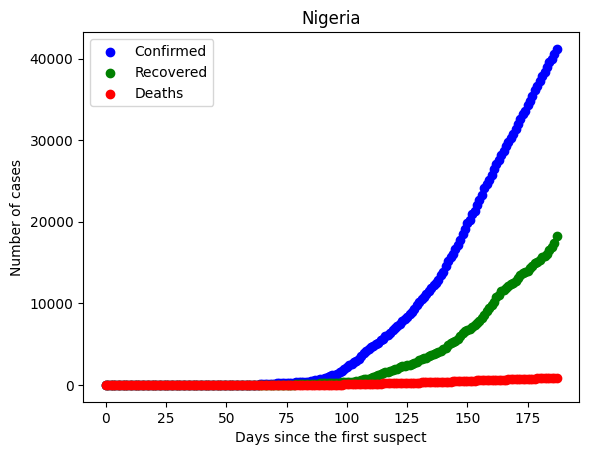

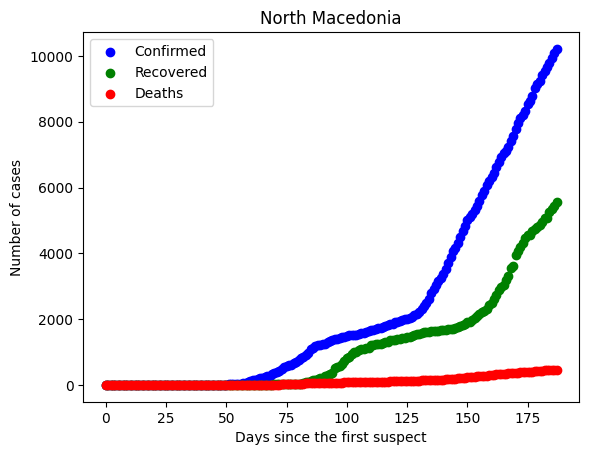

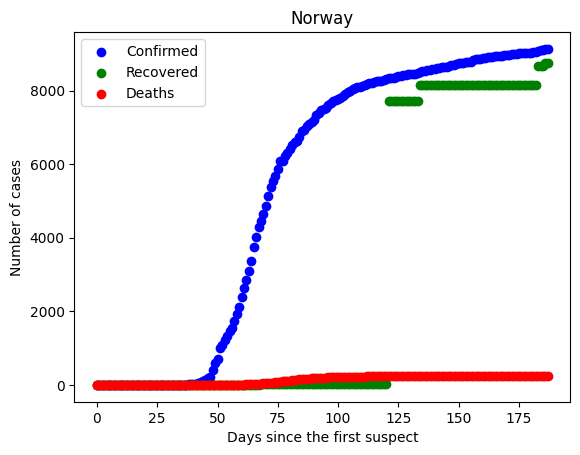

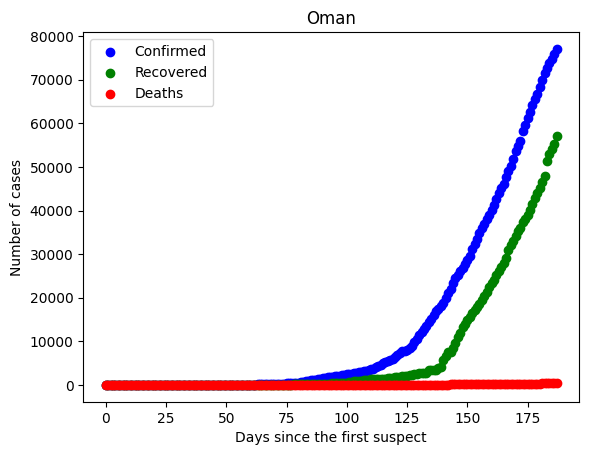

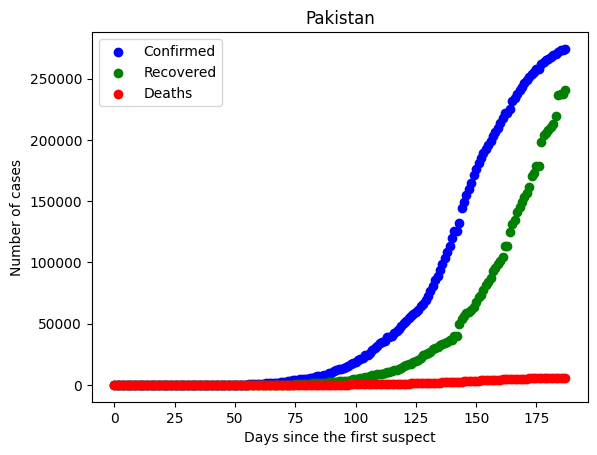

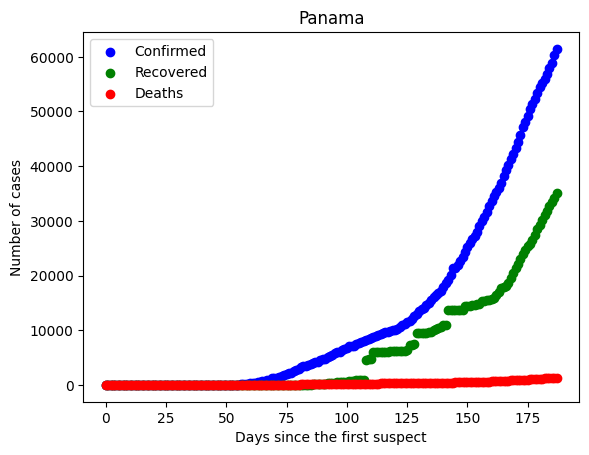

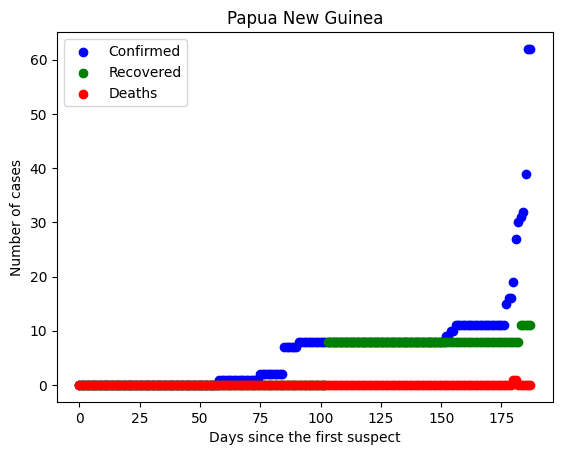

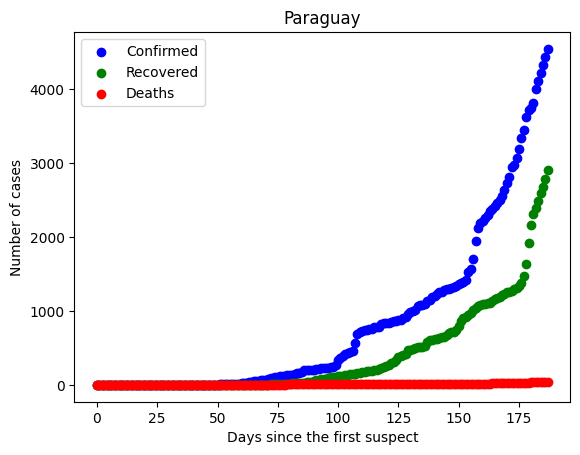

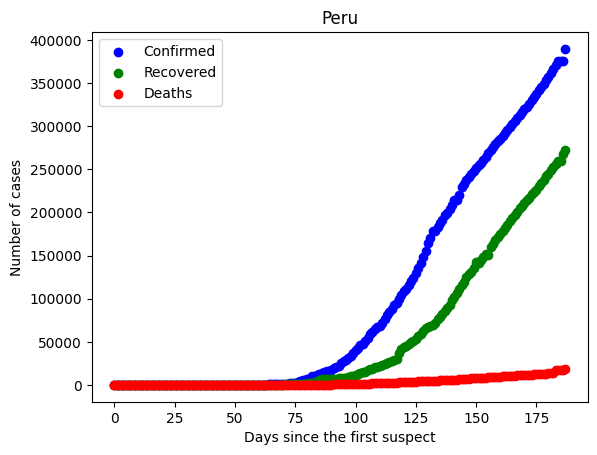

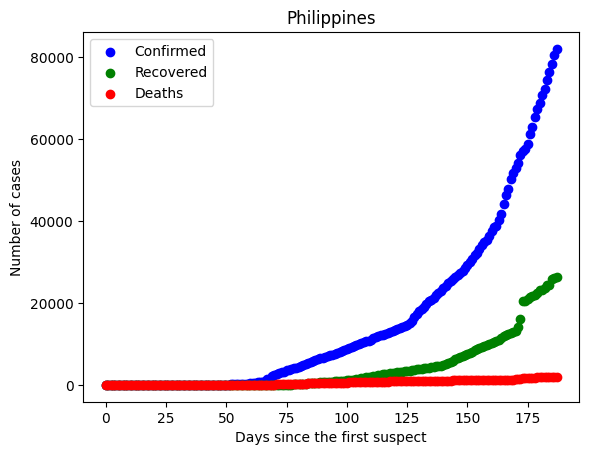

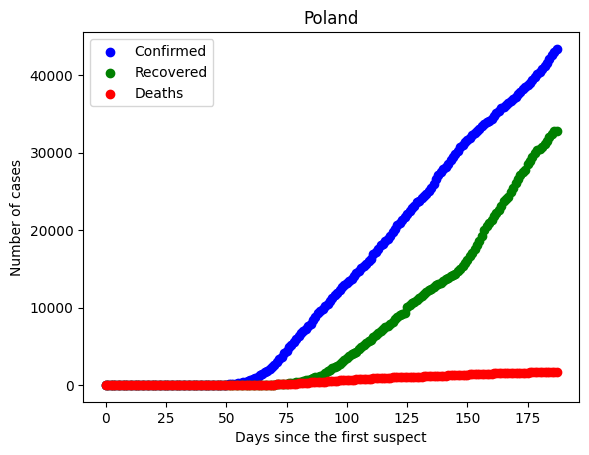

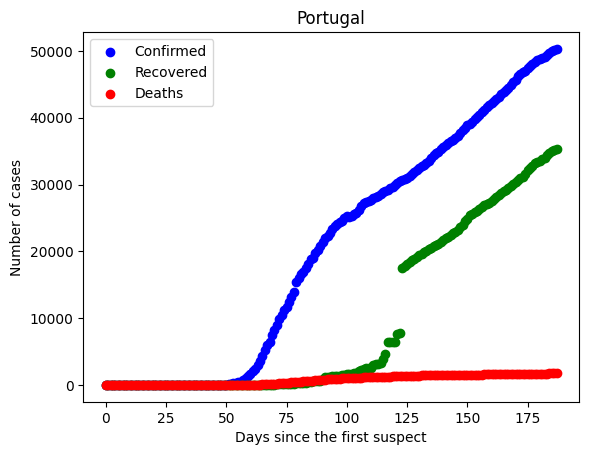

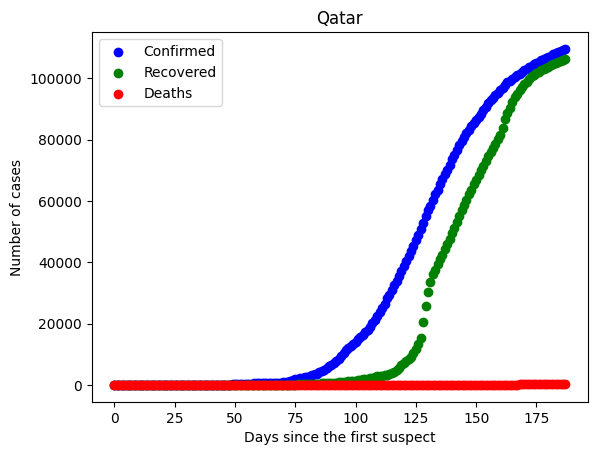

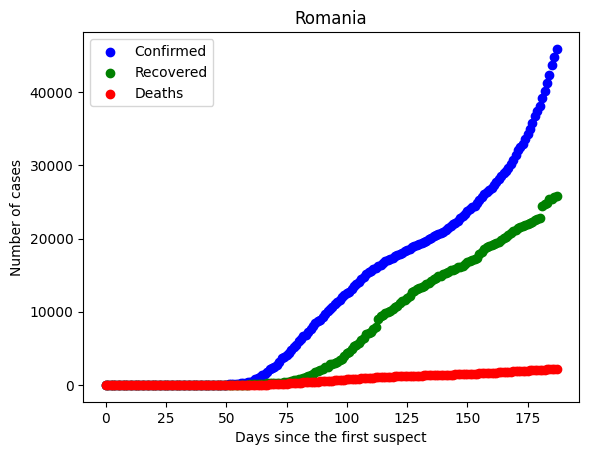

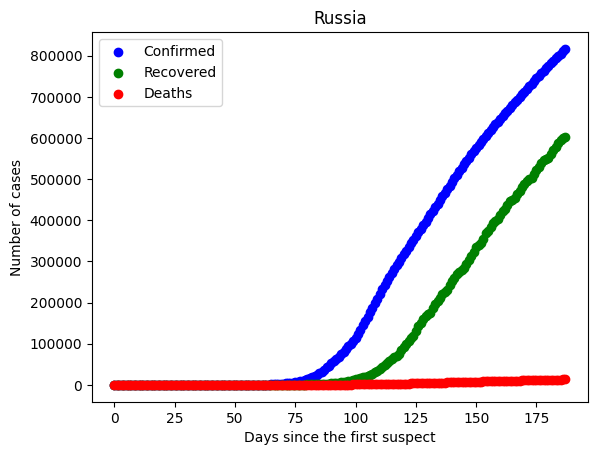

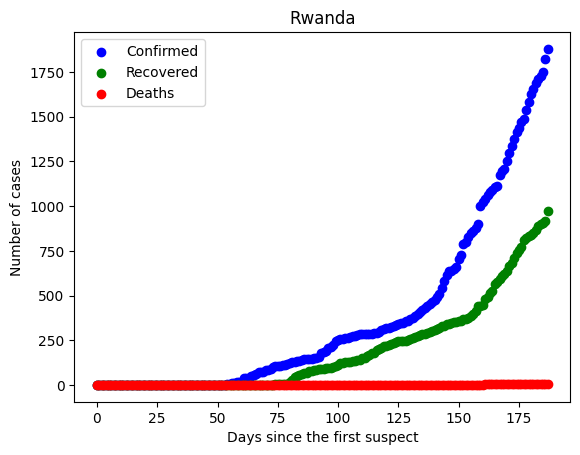

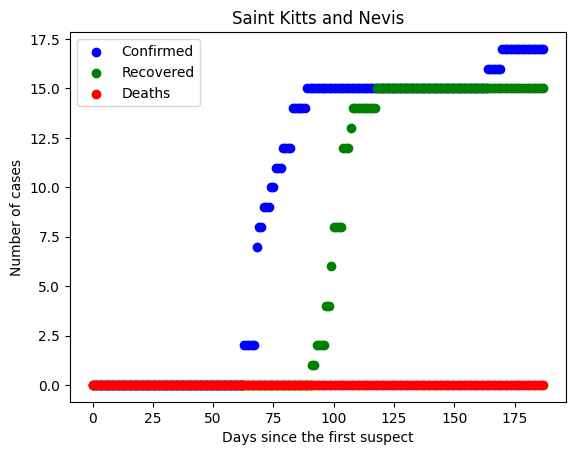

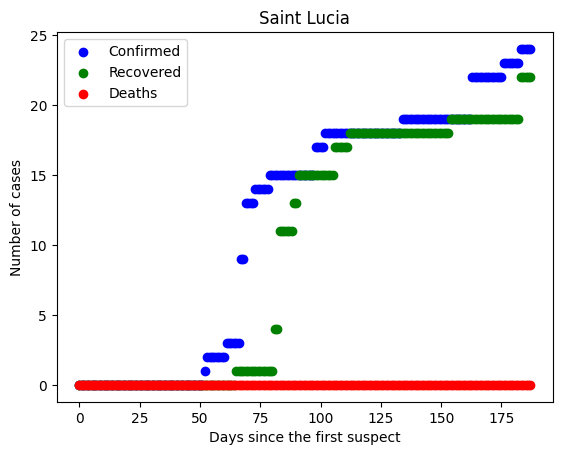

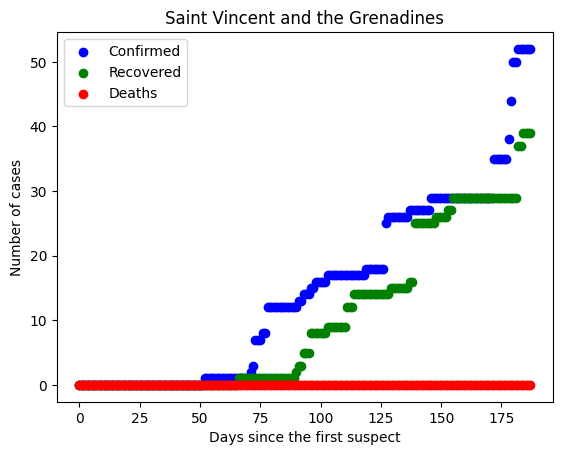

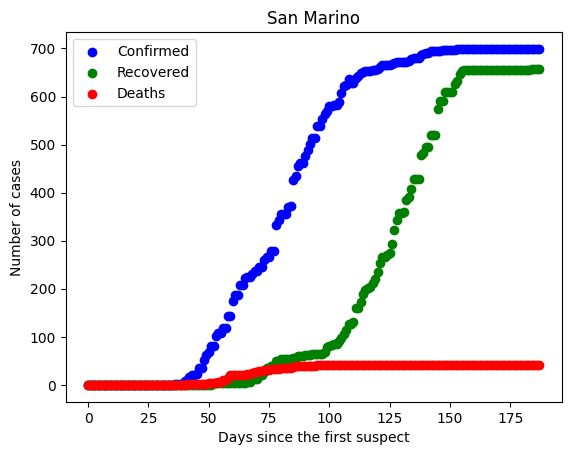

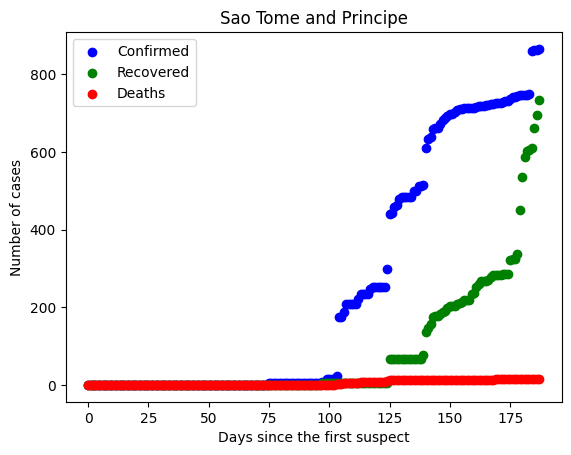

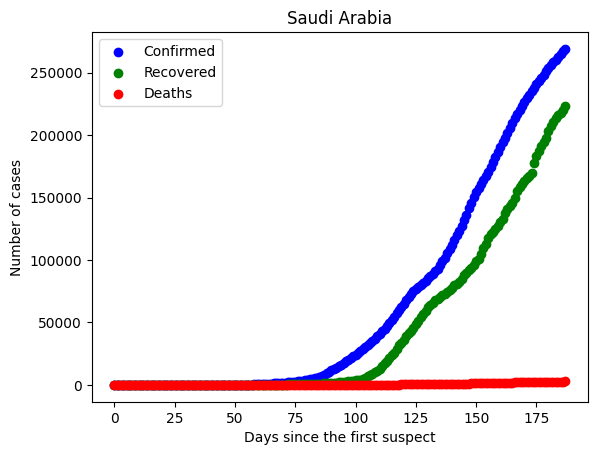

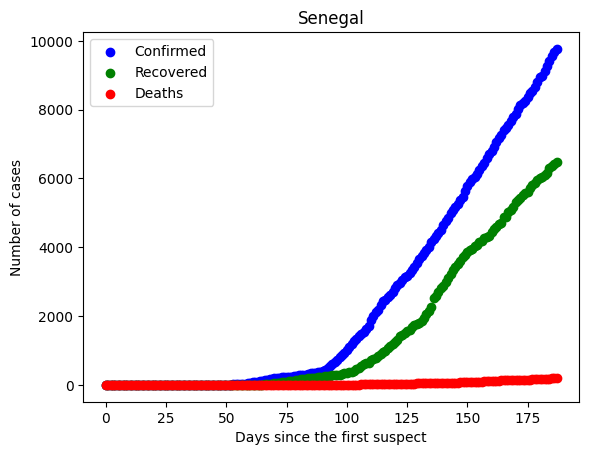

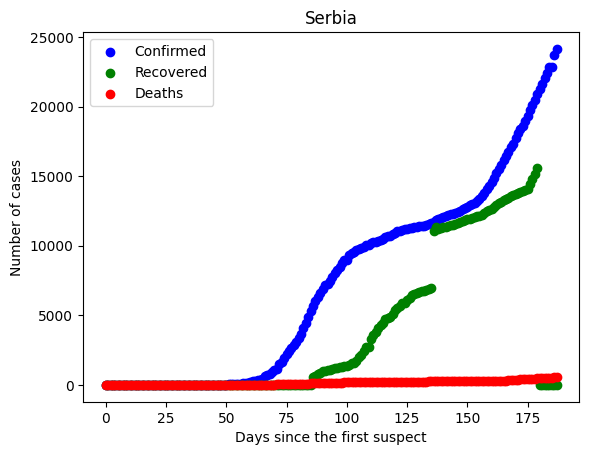

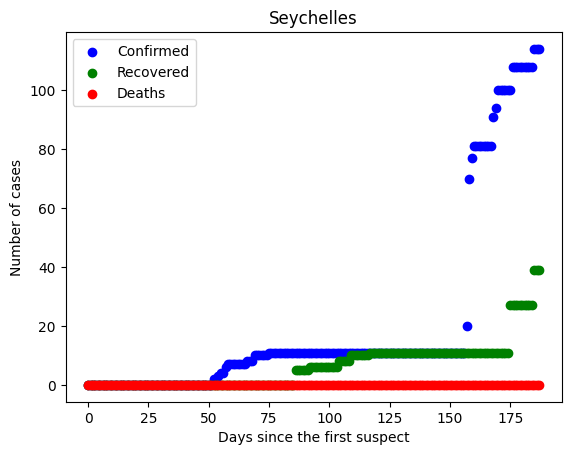

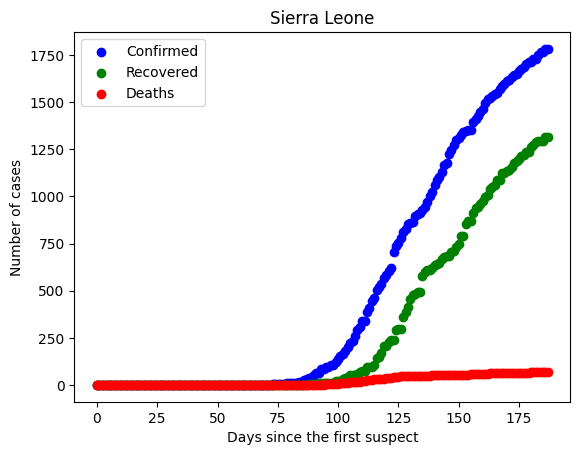

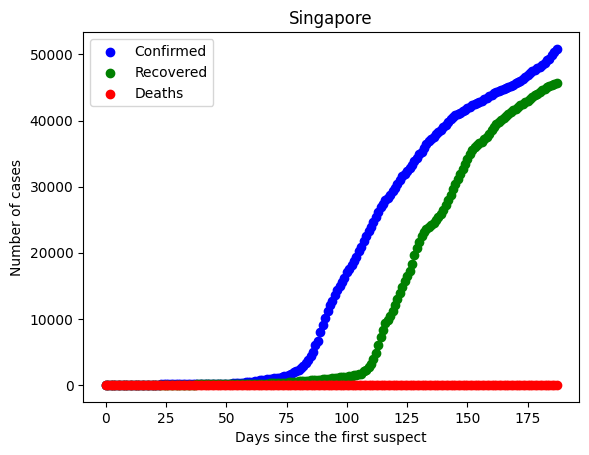

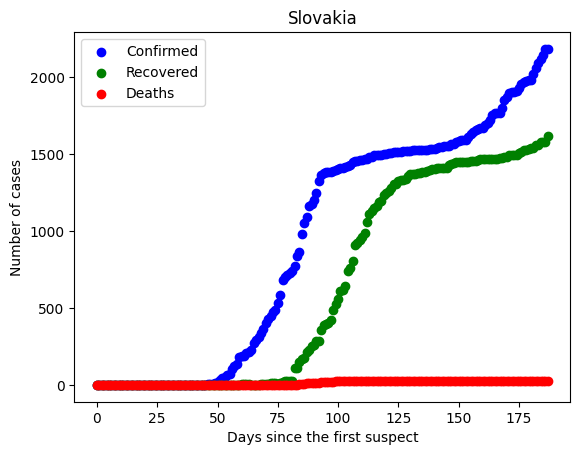

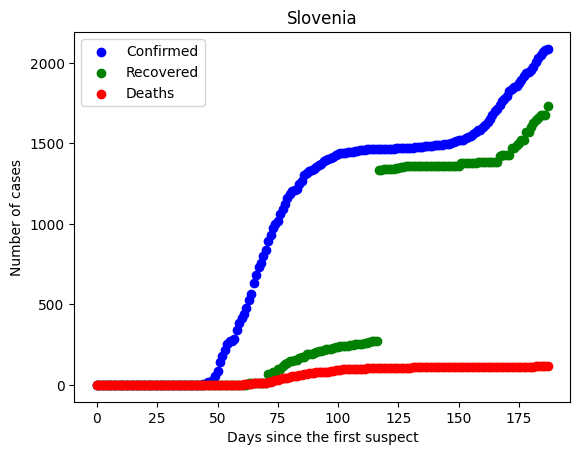

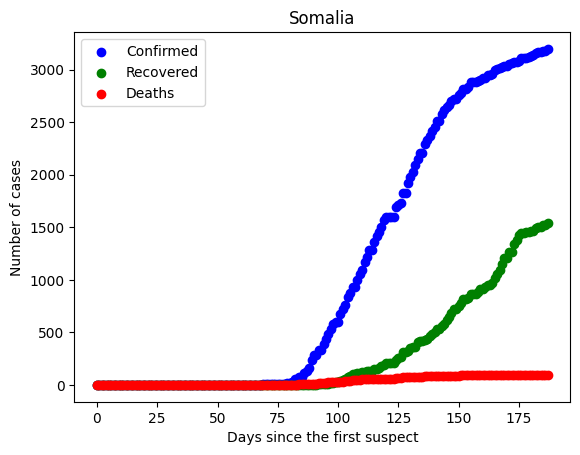

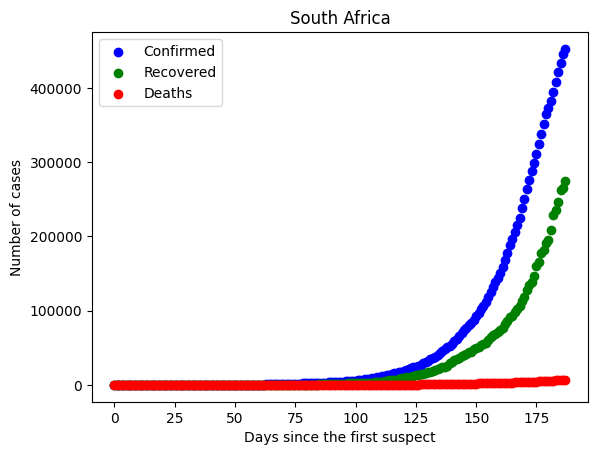

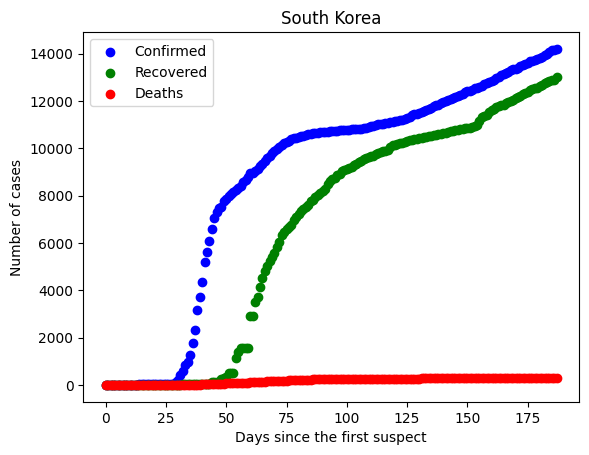

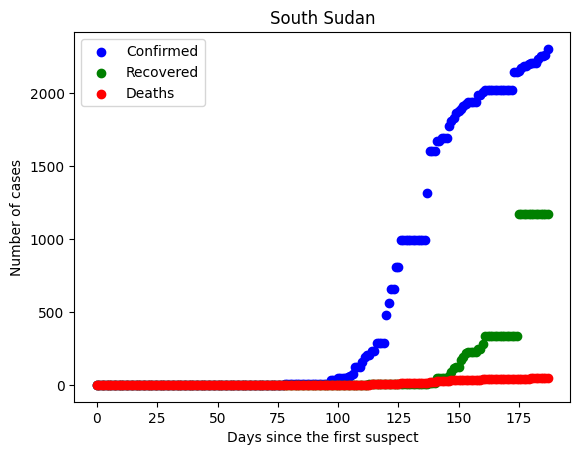

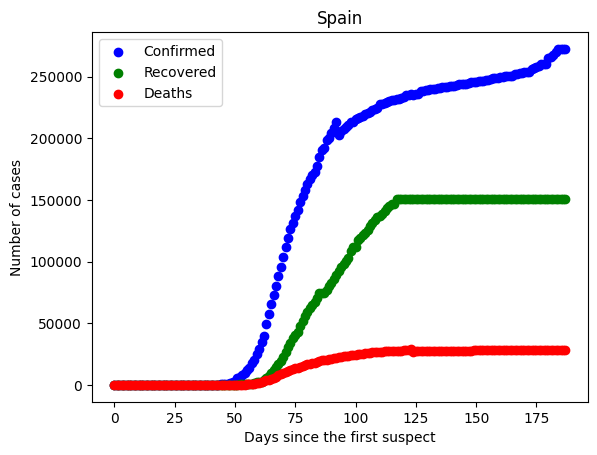

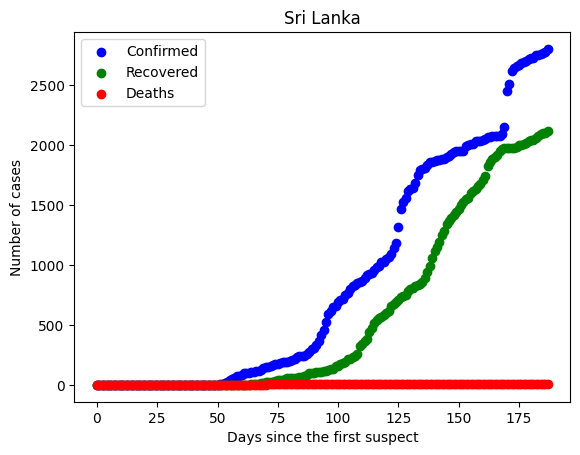

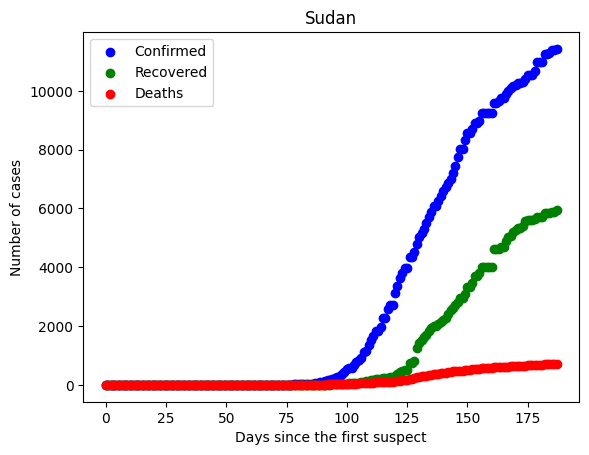

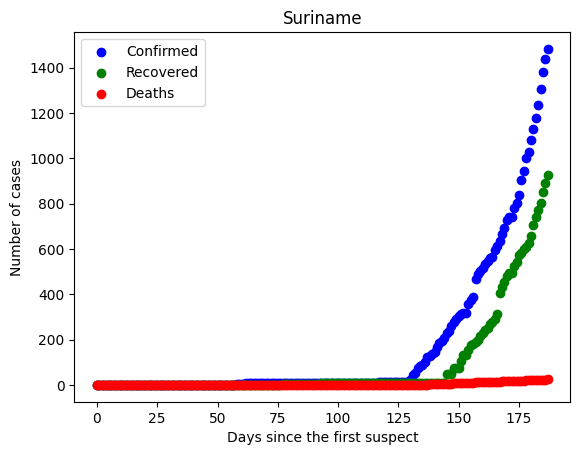

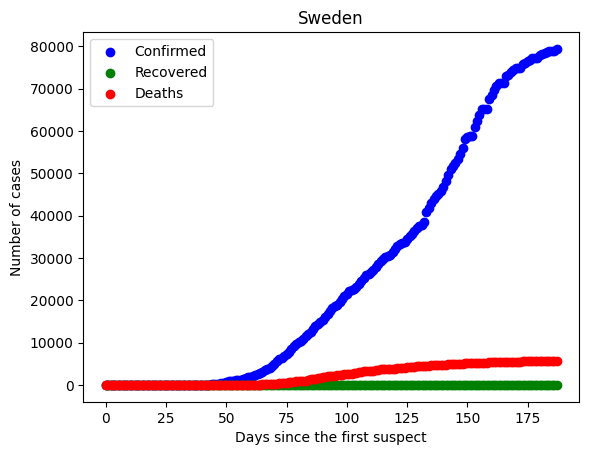

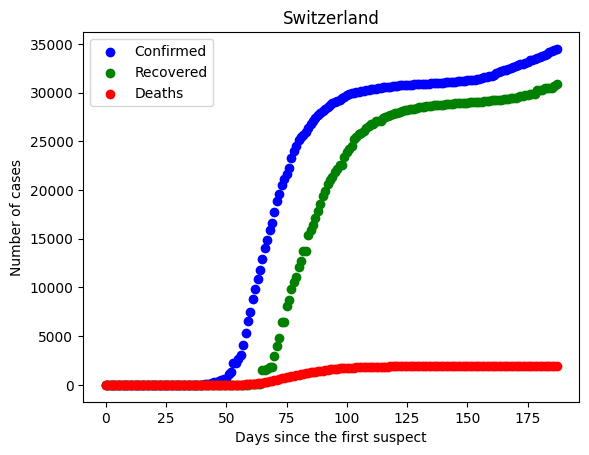

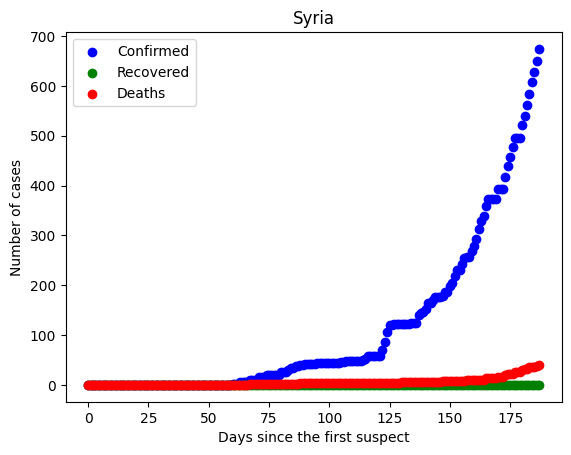

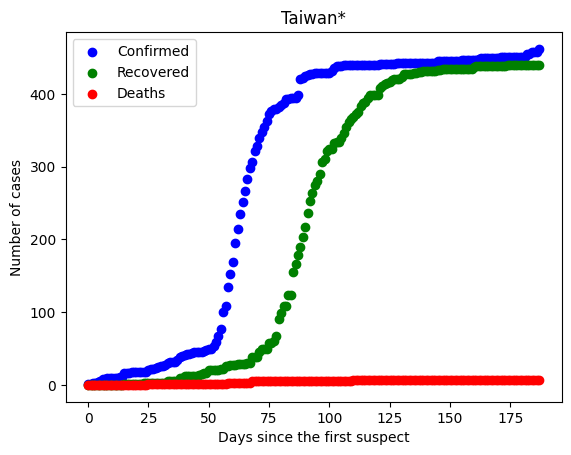

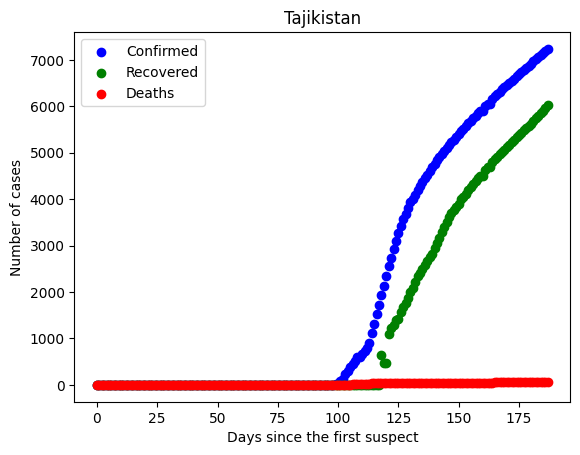

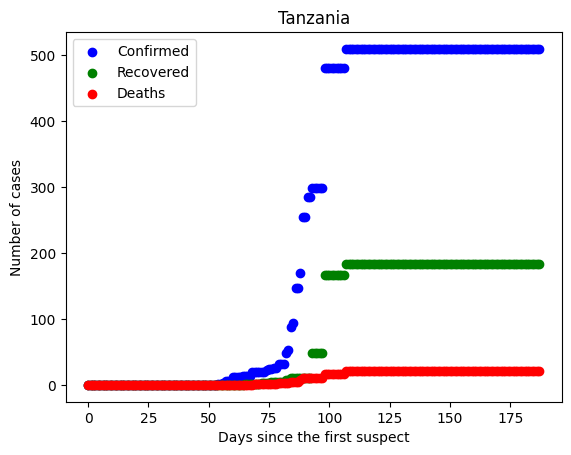

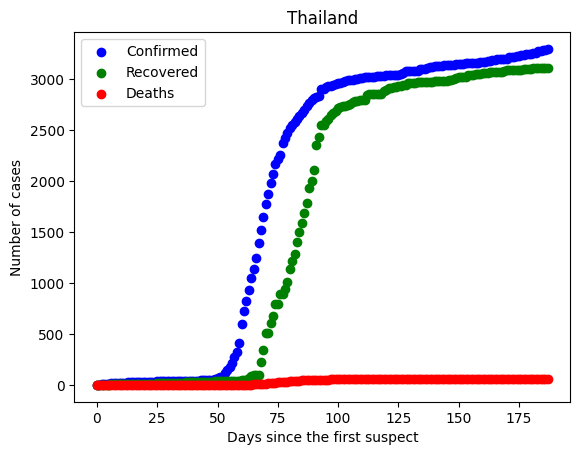

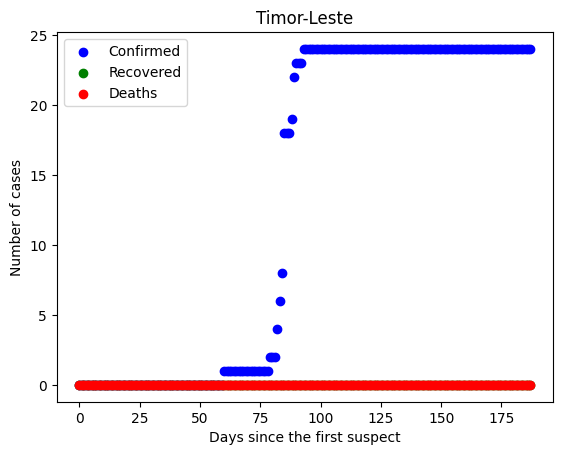

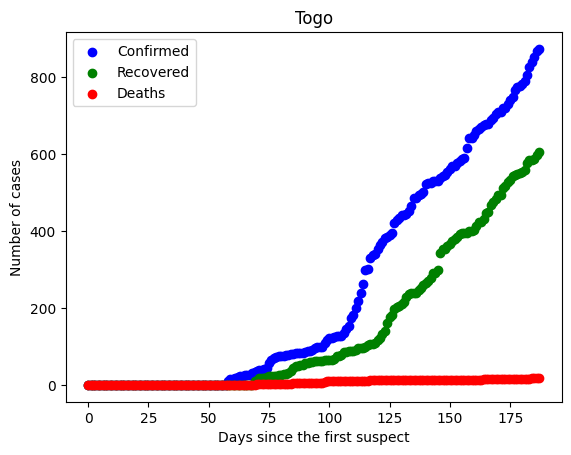

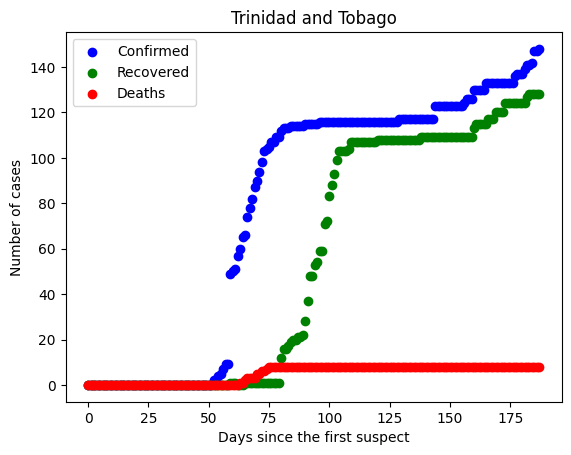

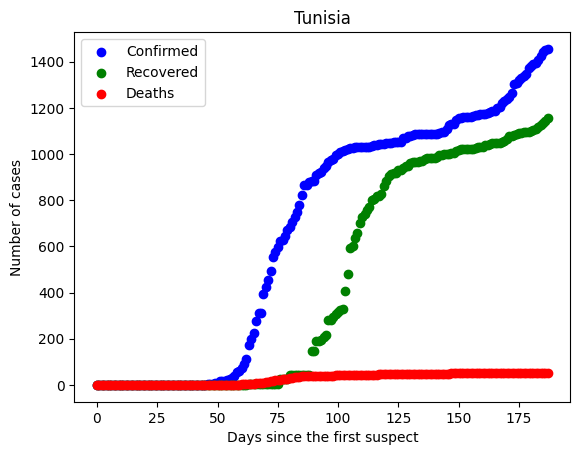

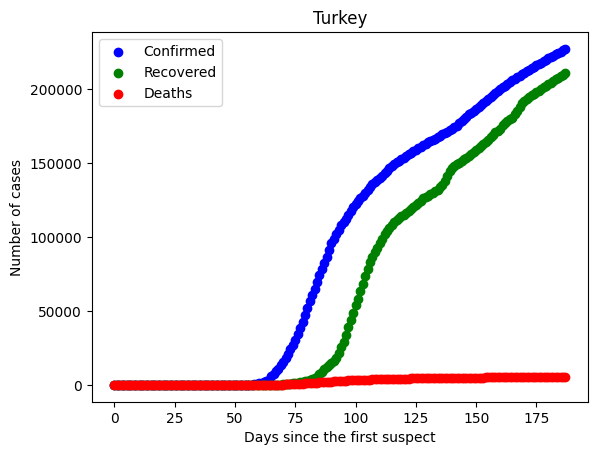

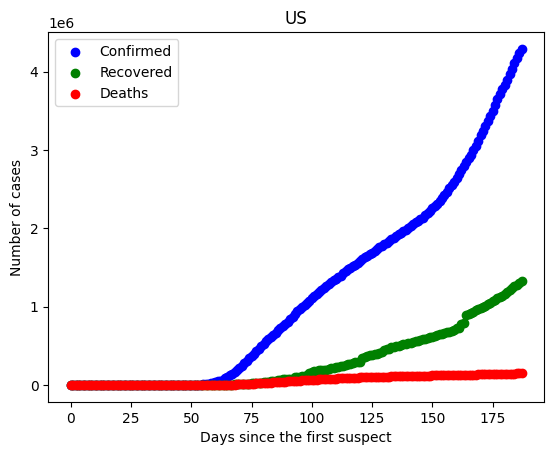

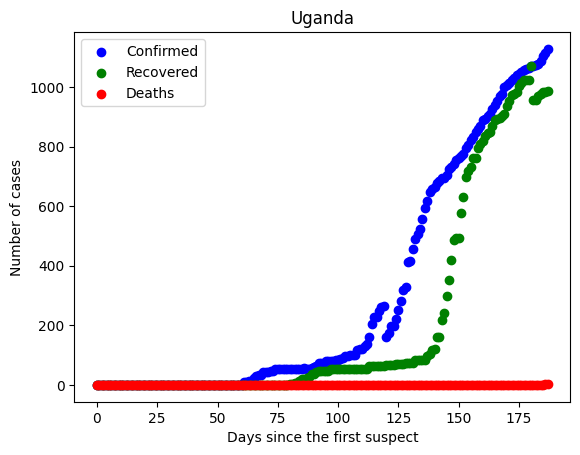

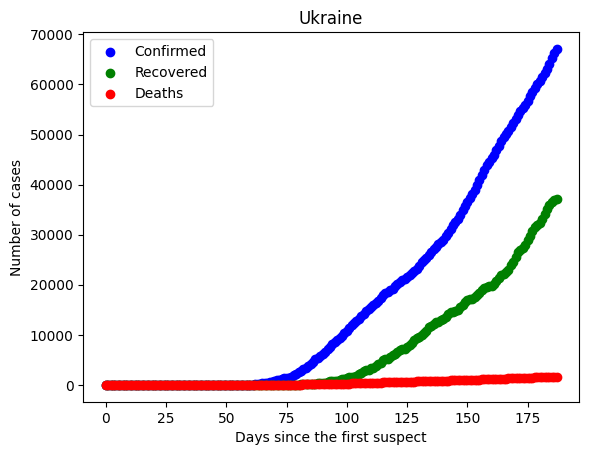

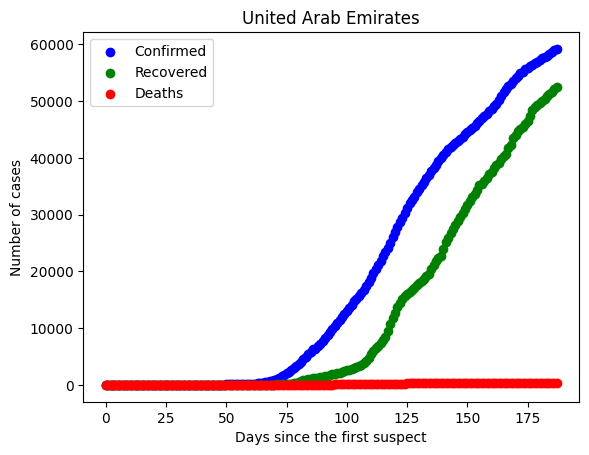

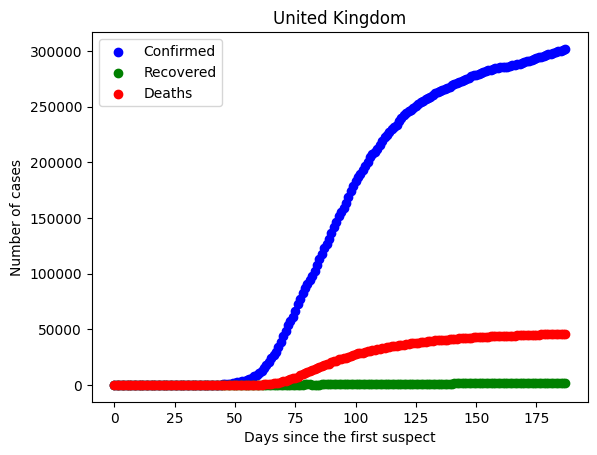

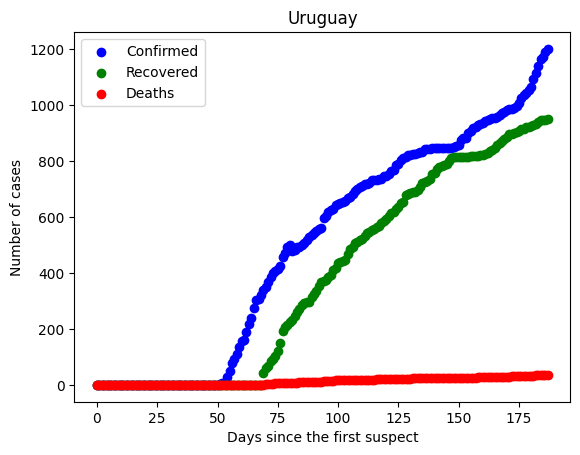

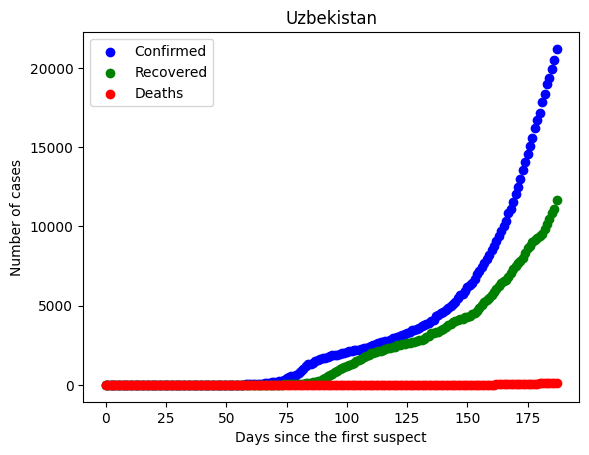

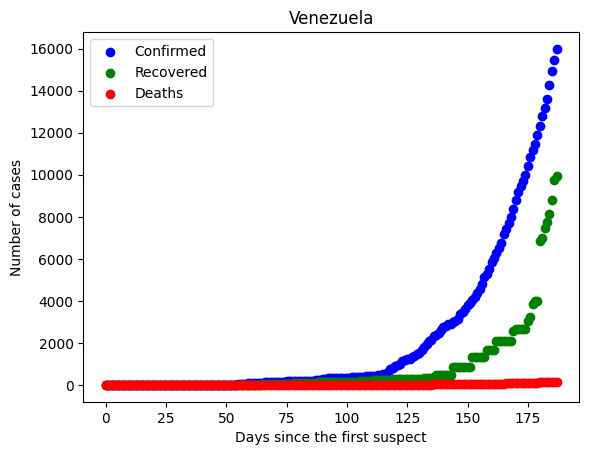

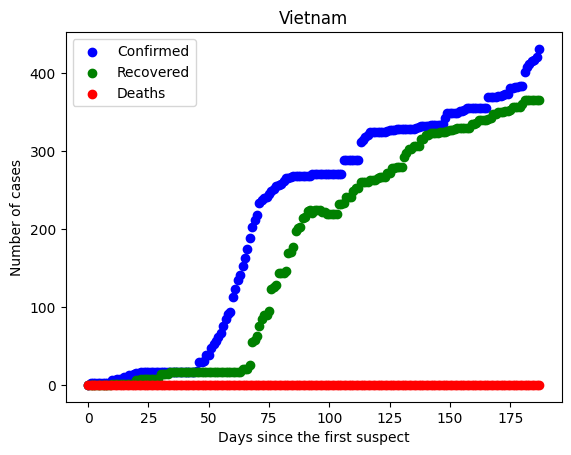

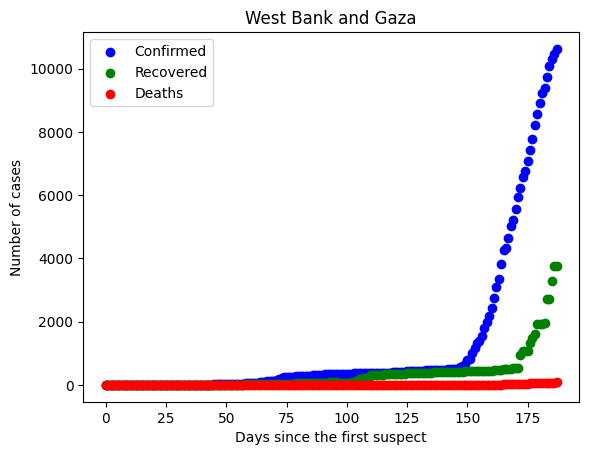

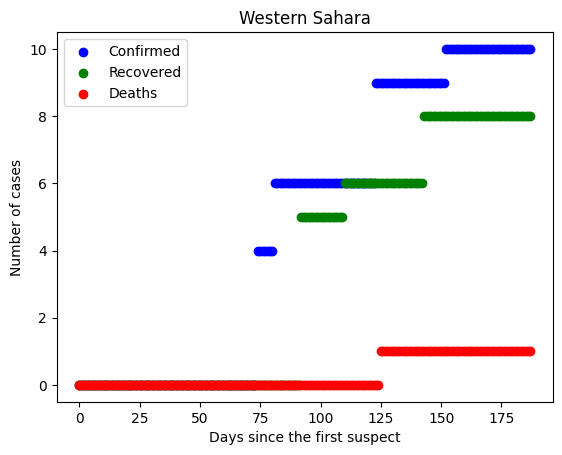

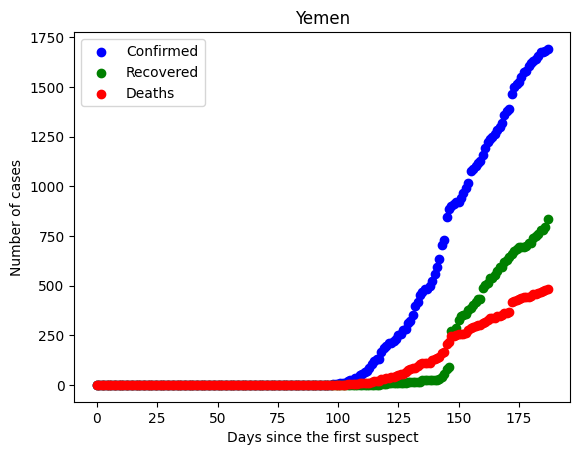

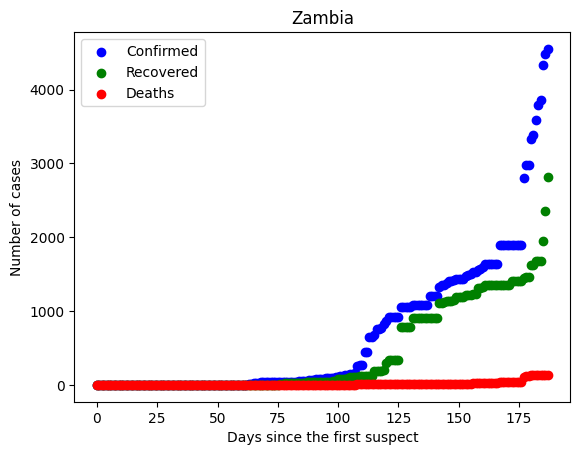

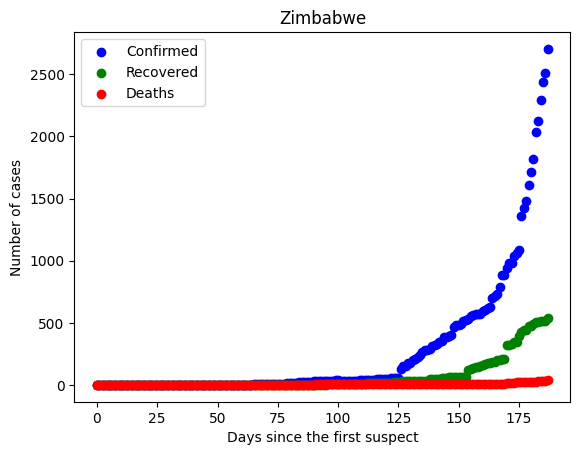

In [11]:
#show by country
for idx in range(len(countries)):
    C = df3[df3['Country'] == countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)), C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)), C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)), C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [12]:
#show world
df4 = df3.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

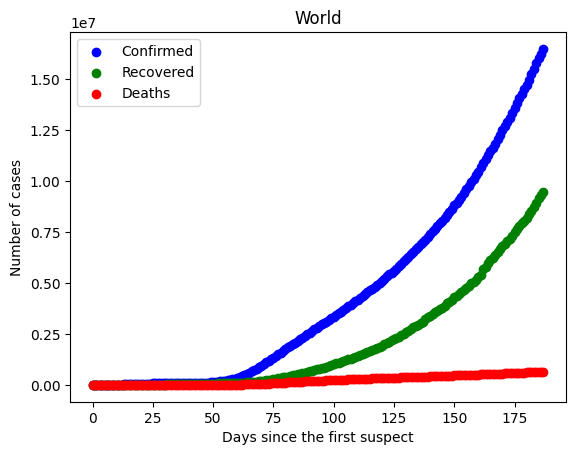

In [13]:
C = df4
plt.scatter(np.arange(0,len(C)), C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)), C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)), C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()